In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the samples
# Directory containing the samples
samples_dir = './results/repl_uci/mclmc_energy_4_hidden_layers/samples'

# Load one sample to find all keys
data = np.load(os.path.join(samples_dir, '0', 'sample_0.npz'))
keys = data.files

# Function to load samples from npz files
def load_samples(samples_dir):
    samples = {key: [] for key in keys}
    for chain_dir in os.listdir(samples_dir):
        chain_path = os.path.join(samples_dir, chain_dir)
        if os.path.isdir(chain_path):
            for sample_file in os.listdir(chain_path):
                if sample_file.endswith('.npz'):
                    sample_path = os.path.join(chain_path, sample_file)
                    data = np.load(sample_path)
                    for key in keys:
                        samples[key].append(data[key])
    for key in samples:
        samples[key] = np.array(samples[key])
    return samples

# Load the samples
samples = load_samples(samples_dir)

# Plot histograms of different layers of kernel and bias
#def plot_histograms(samples):
#    for key in samples:
#        plt.figure()
#        plt.hist(samples[key].flatten(), bins=50, alpha=0.75)
#        plt.title(f'Histogram of {key}')
#        plt.xlabel('Value')
#        plt.ylabel('Frequency')
#        plt.show()
#plot_histograms(samples)

In [2]:
weights = np.matmul(samples['fcn.layer1.kernel'],samples['fcn.layer2.kernel'])
weights = np.matmul(weights,samples['fcn.layer3.kernel'])

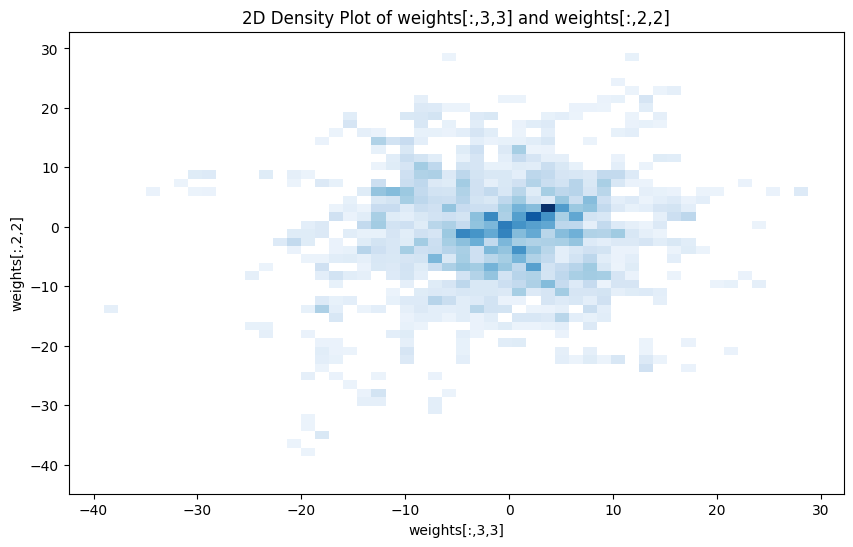

Statistic: 159.05504098973373, p-value: 2.894920819647675e-35
weights_33 does not follow a Gaussian distribution (reject H0)


In [6]:
import seaborn as sns
from scipy.stats import normaltest

# Extract the specific weights
weights_33 = weights[:, 3, 3]
weights_22 = weights[:, 2, 2]

# Create a 2D density plot
plt.figure(figsize=(10, 6))
sns.histplot(x=weights_33, y=weights_22, bins=50, pthresh=.1, cmap="Blues")
plt.title('2D Density Plot of weights[:,3,3] and weights[:,2,2]')
plt.xlabel('weights[:,3,3]')
plt.ylabel('weights[:,2,2]')
plt.show()
# Test whether weights_33 is Gaussian distribution
stat, p_value = normaltest(weights_33)
print(f'Statistic: {stat}, p-value: {p_value}')

if p_value < 0.05:
    print("weights_33 does not follow a Gaussian distribution (reject H0)")
else:
    print("weights_33 follows a Gaussian distribution (fail to reject H0)")

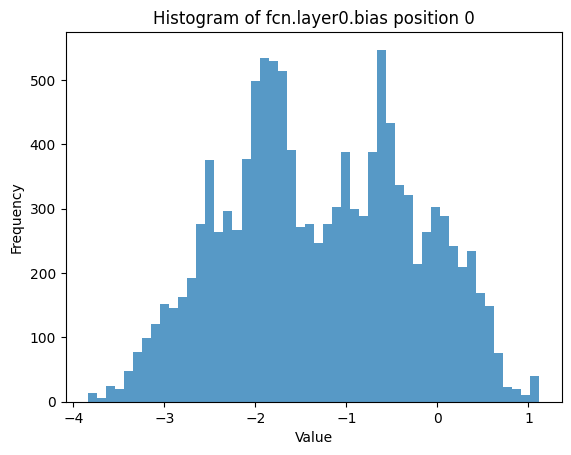

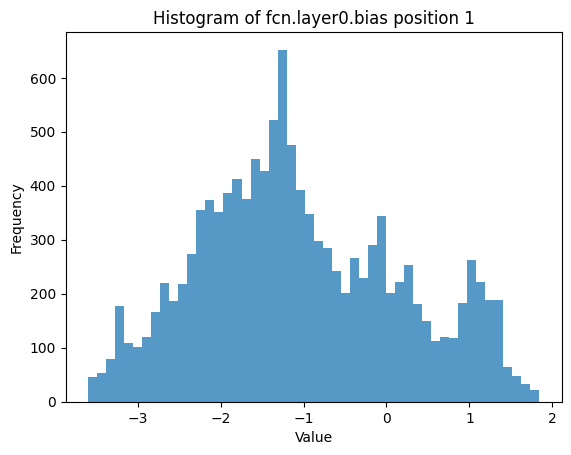

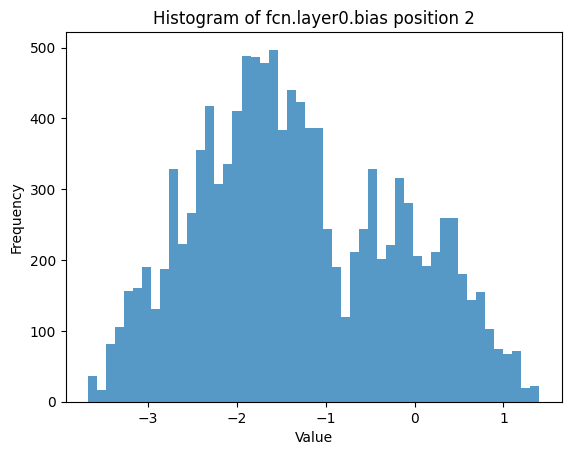

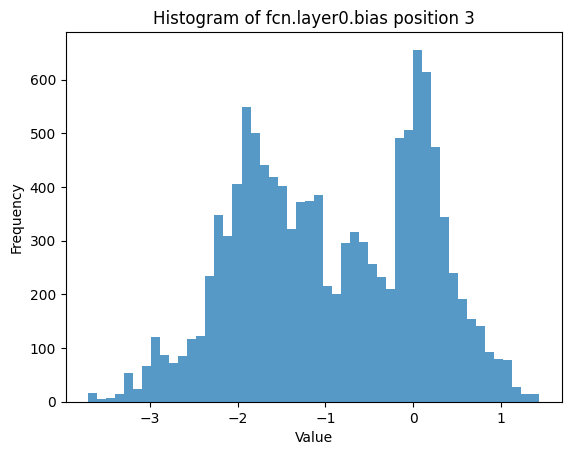

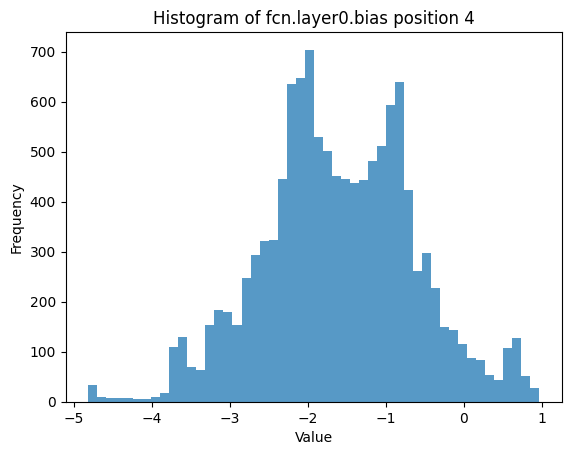

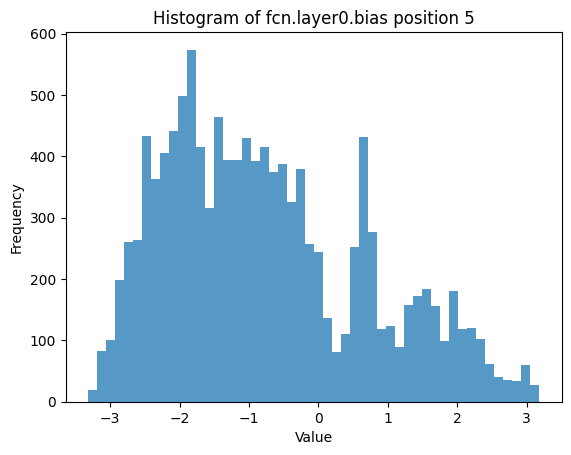

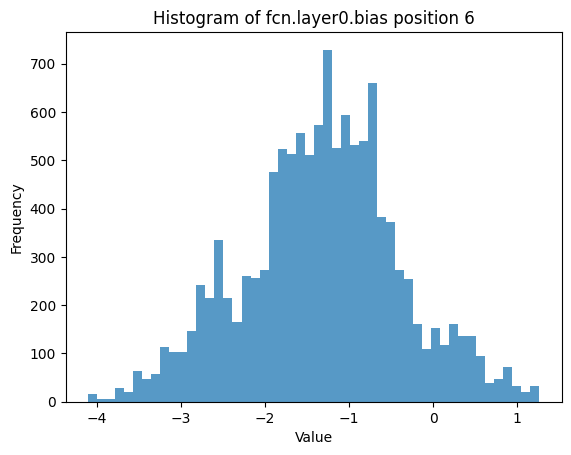

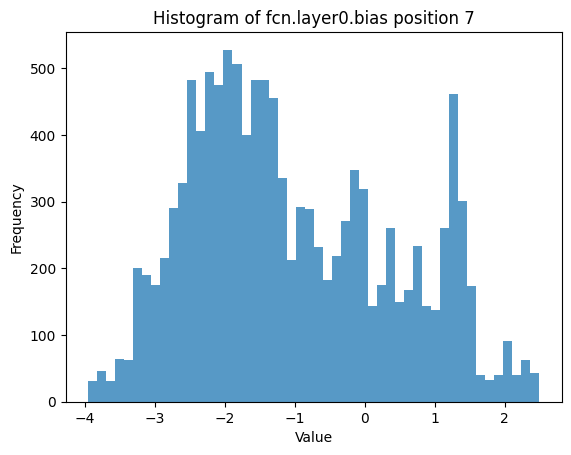

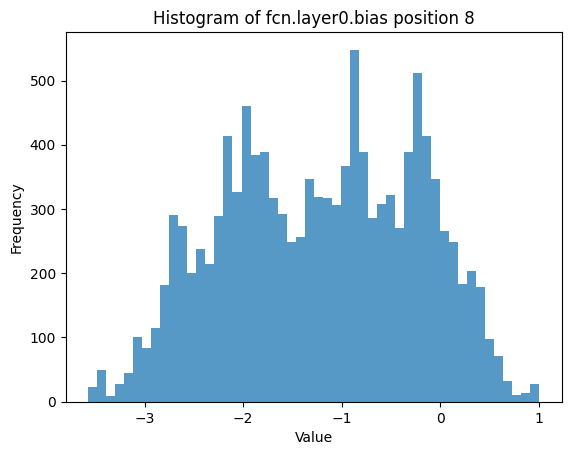

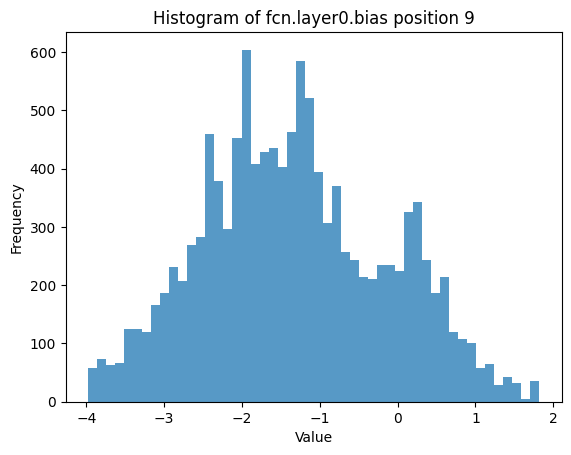

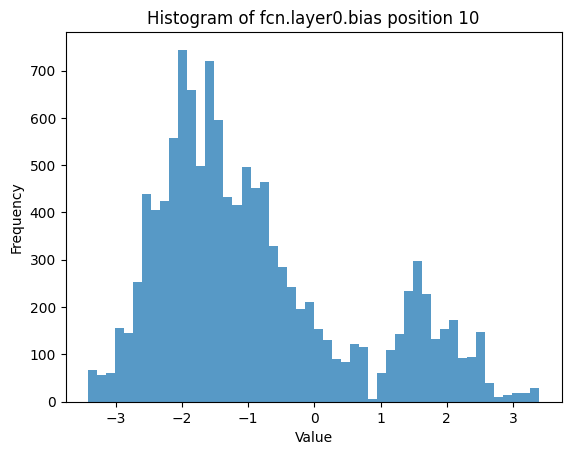

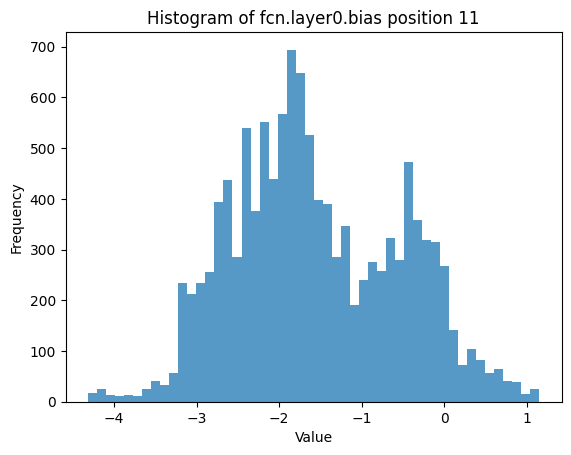

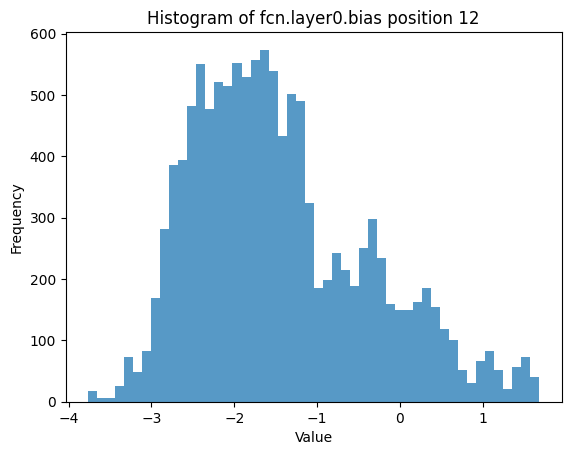

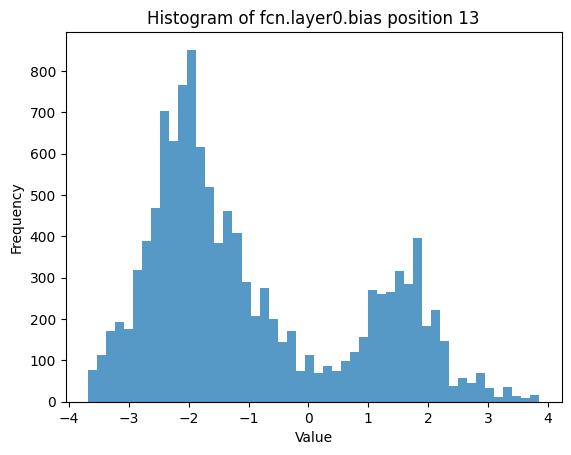

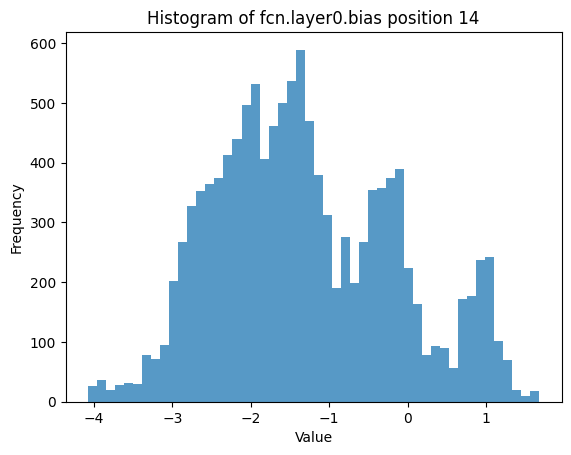

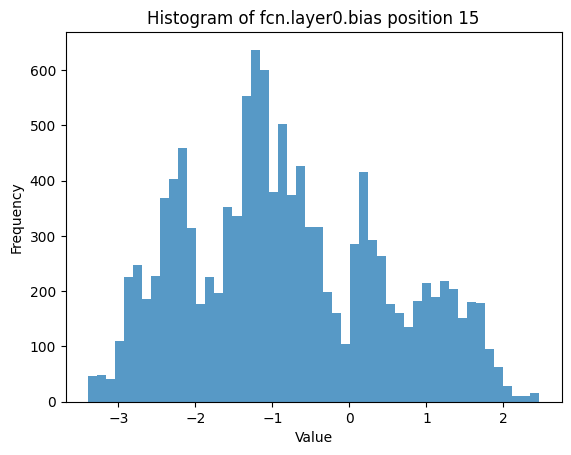

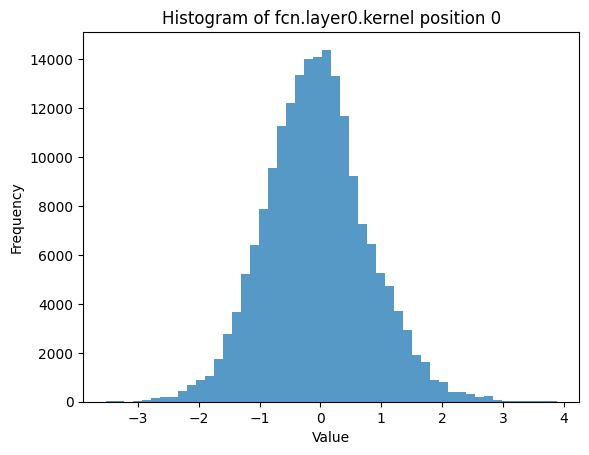

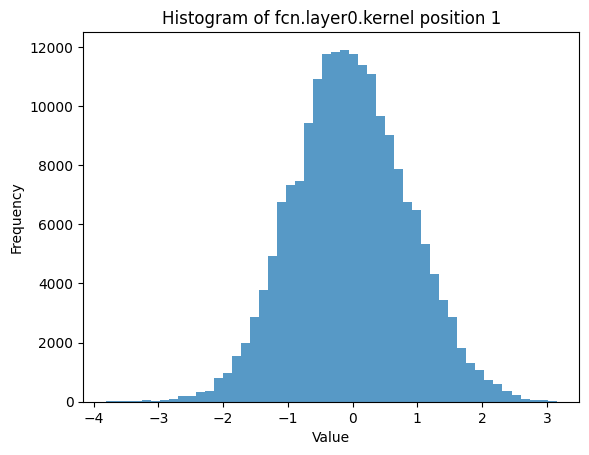

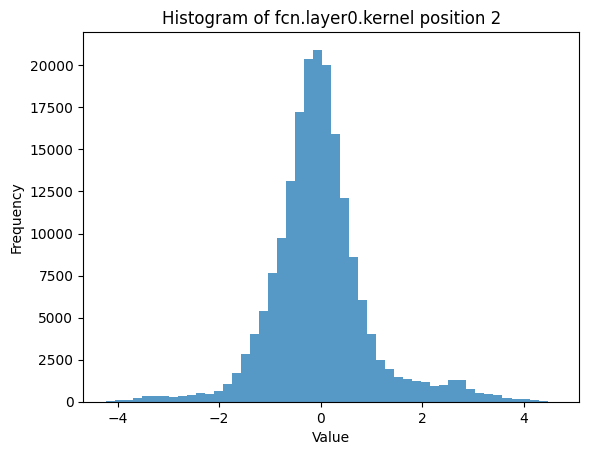

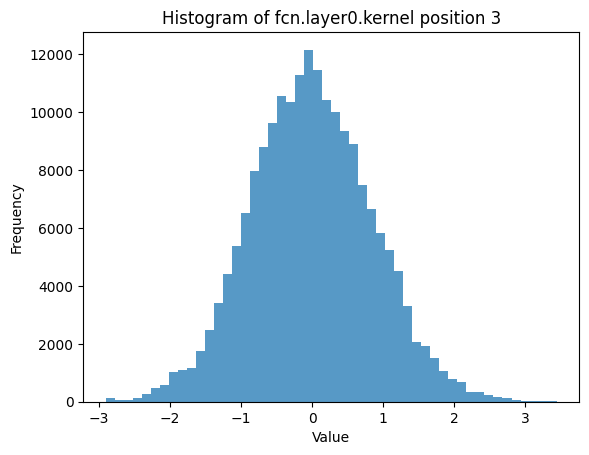

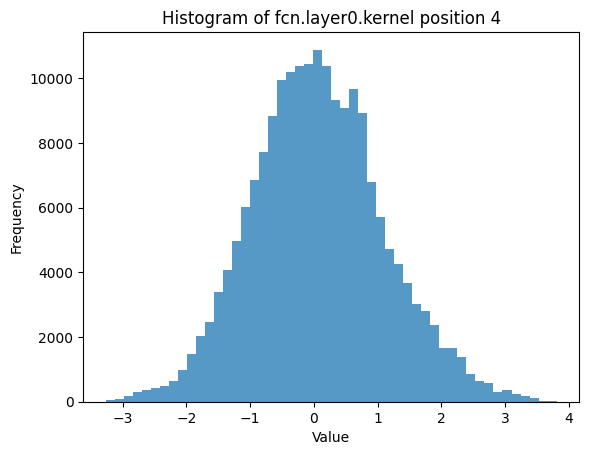

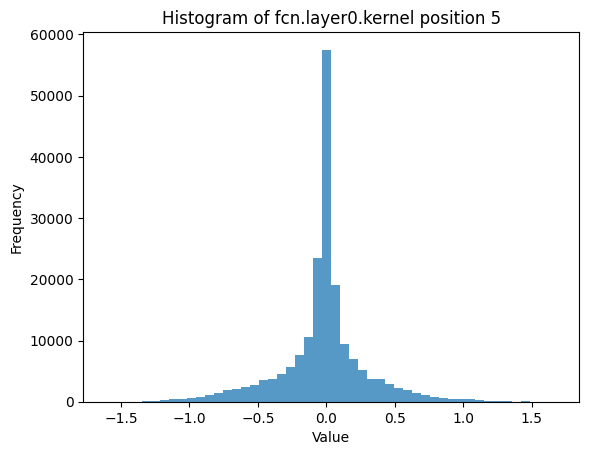

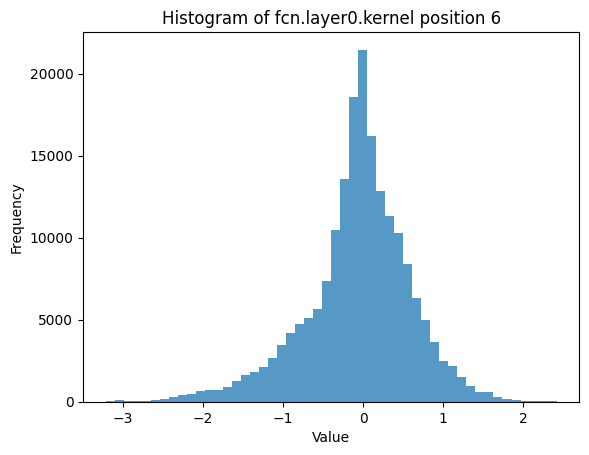

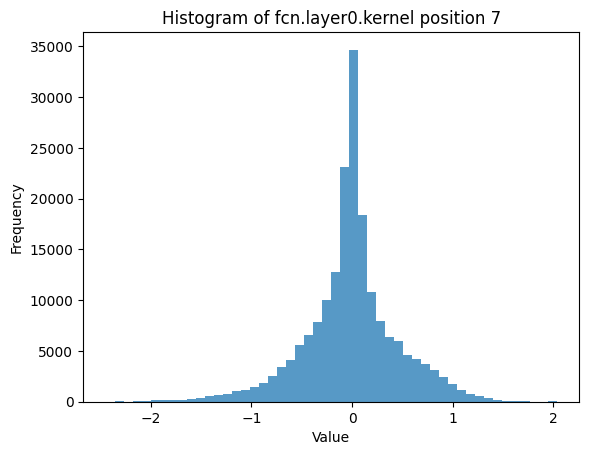

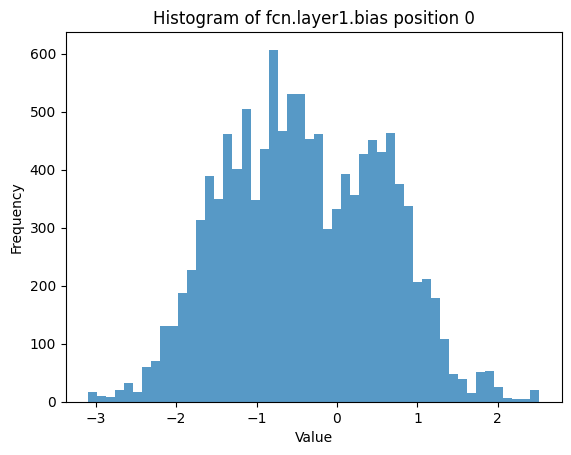

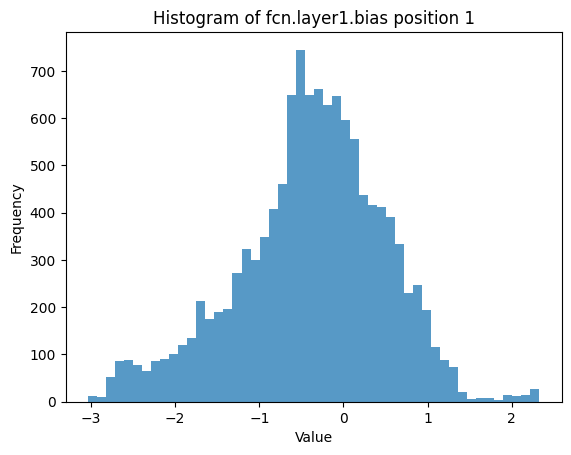

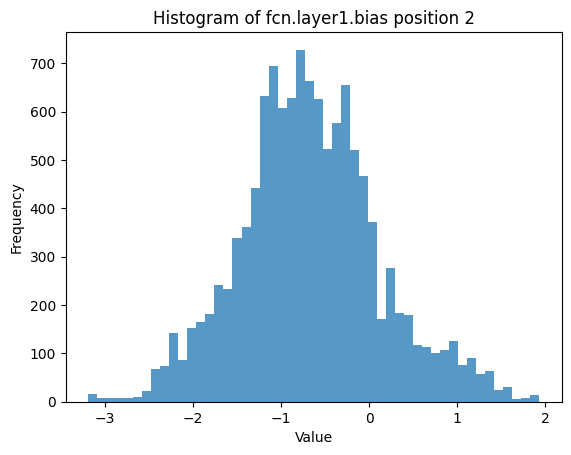

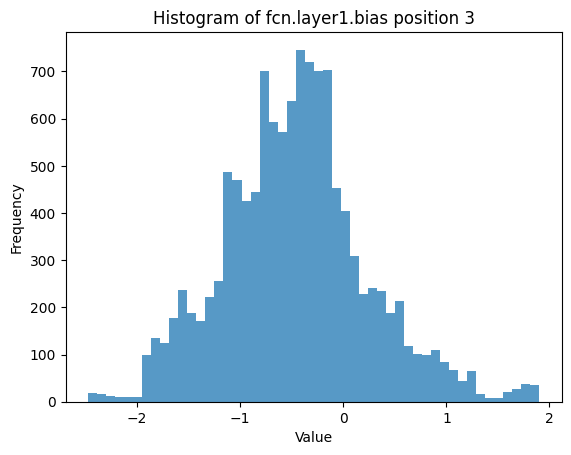

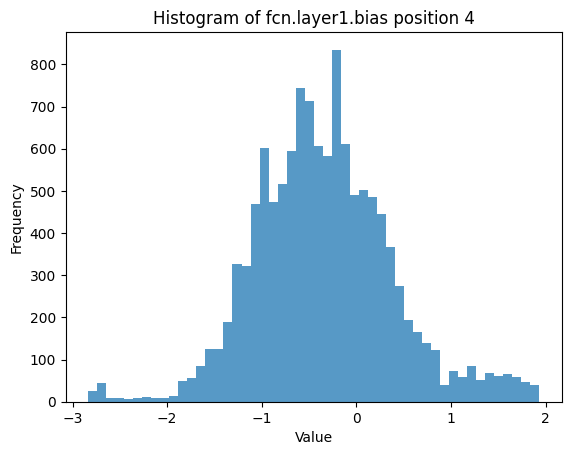

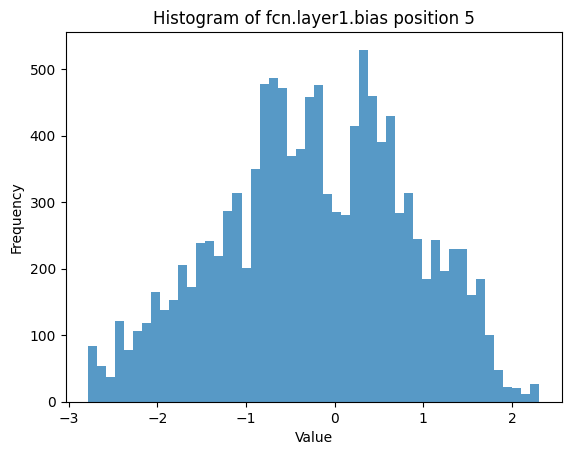

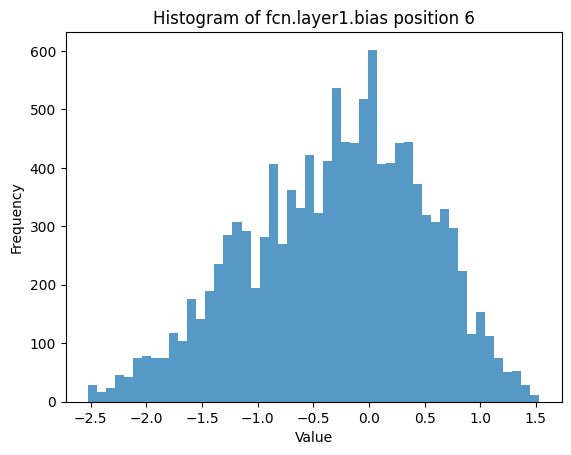

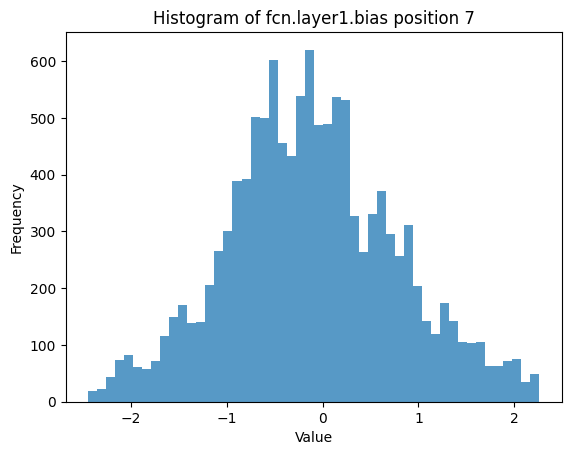

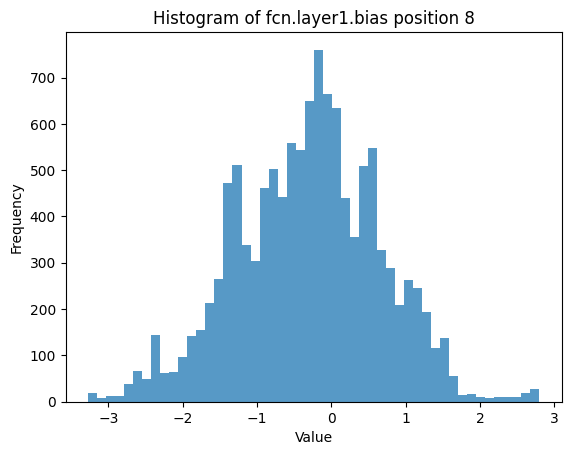

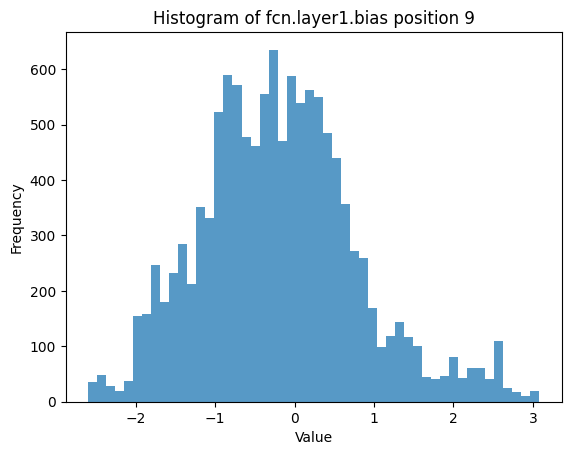

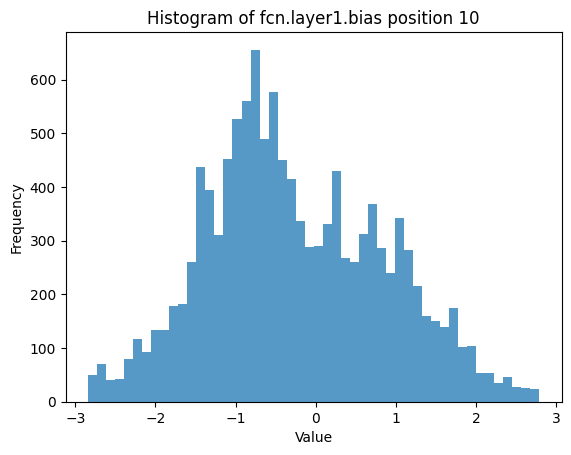

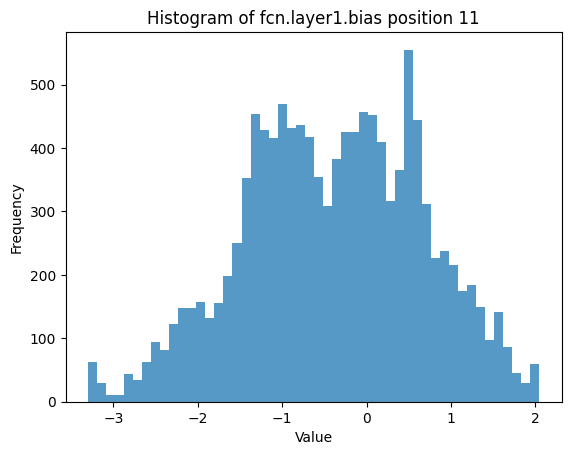

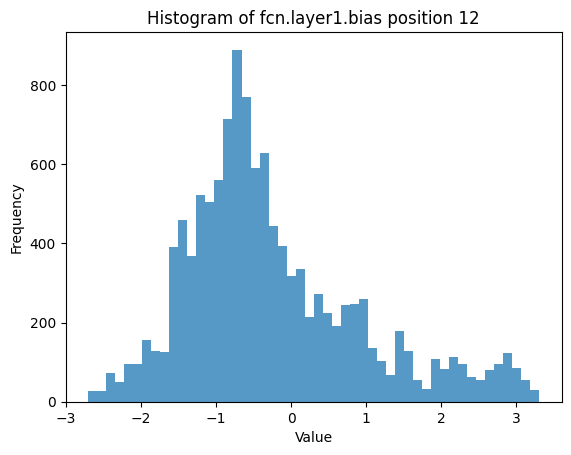

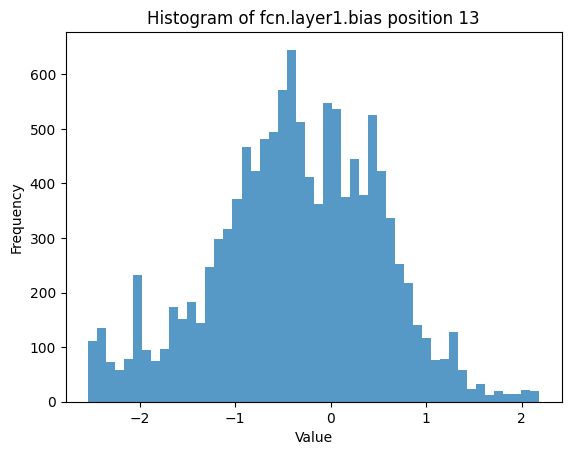

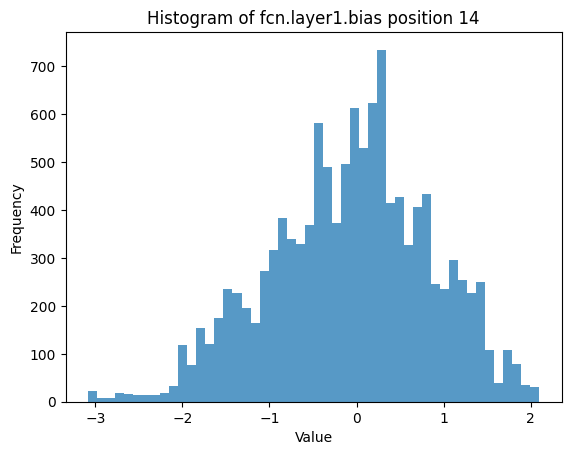

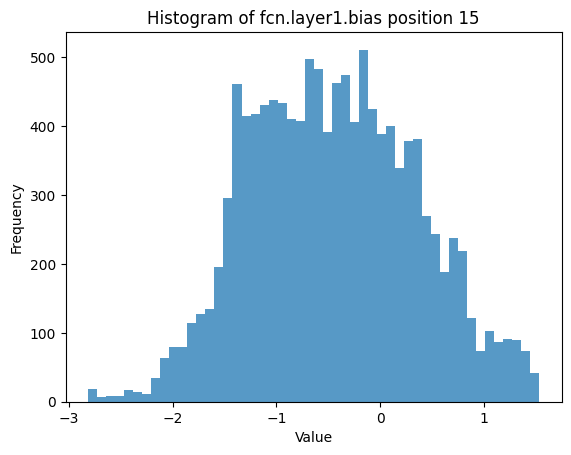

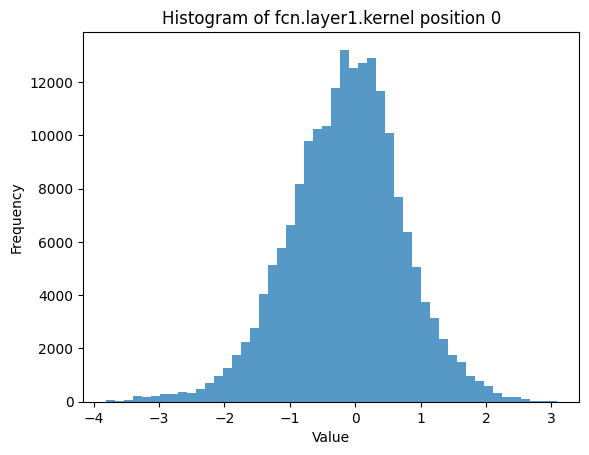

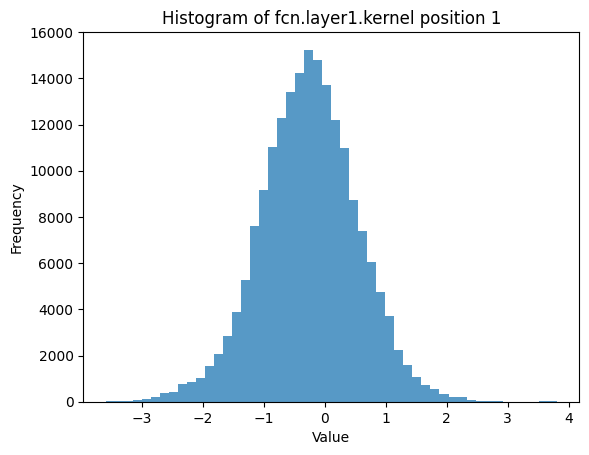

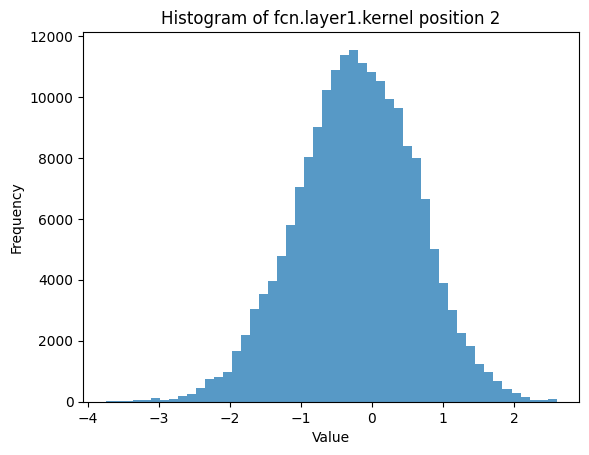

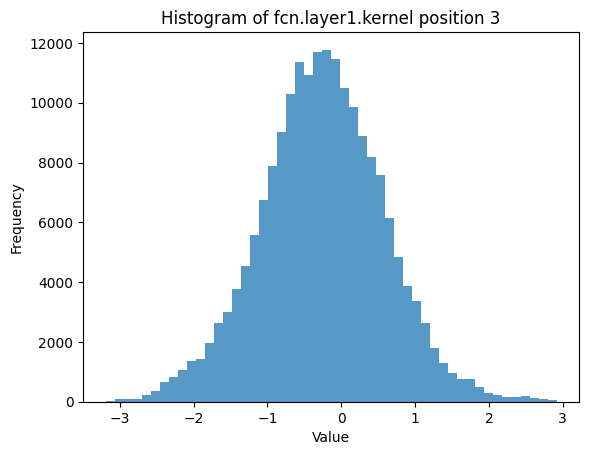

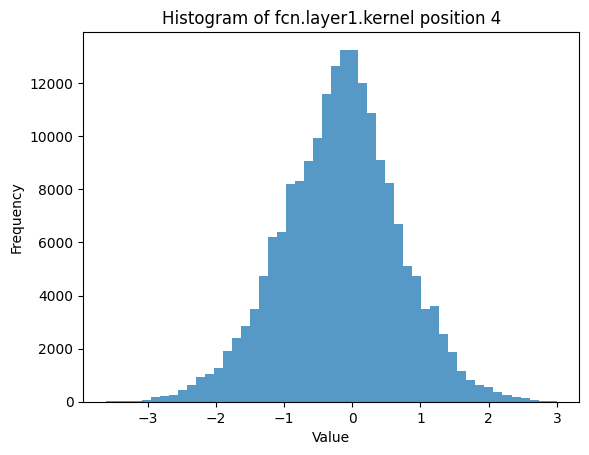

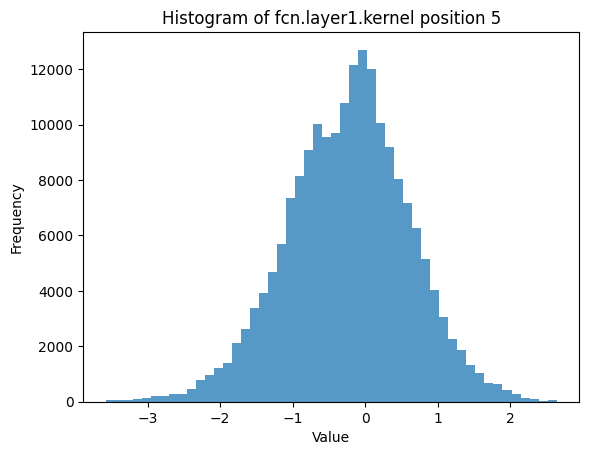

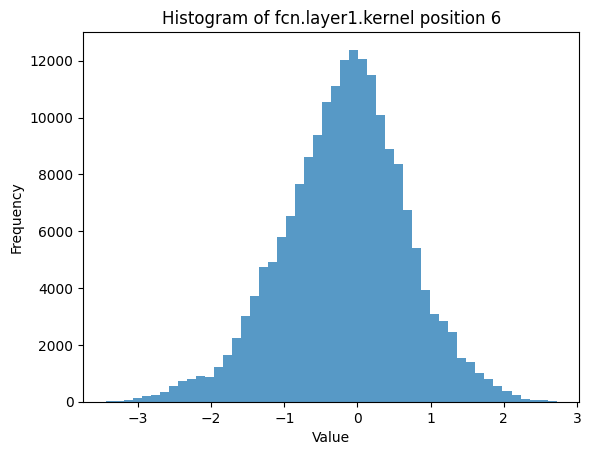

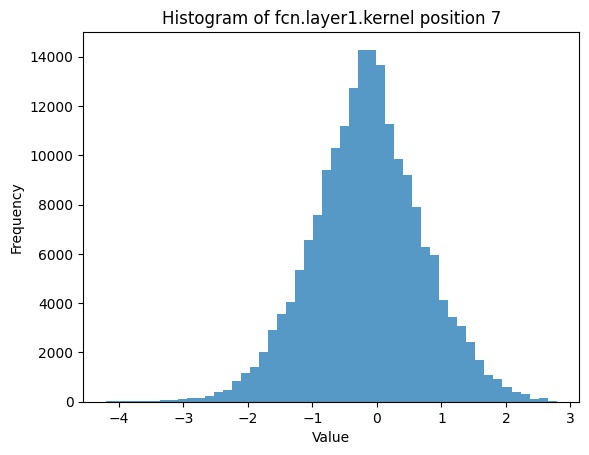

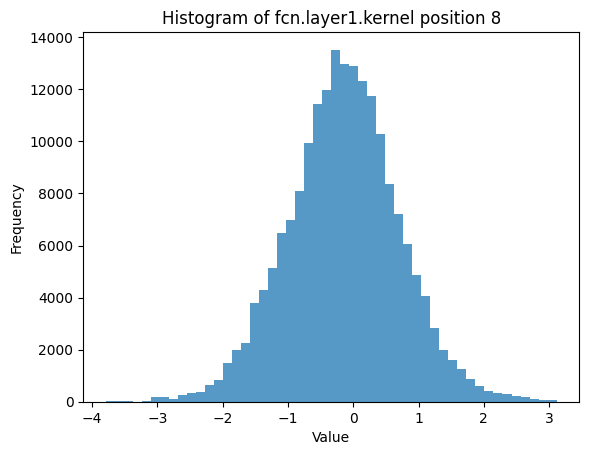

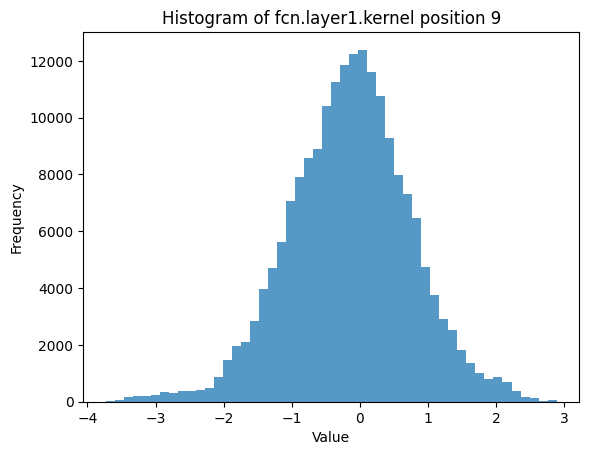

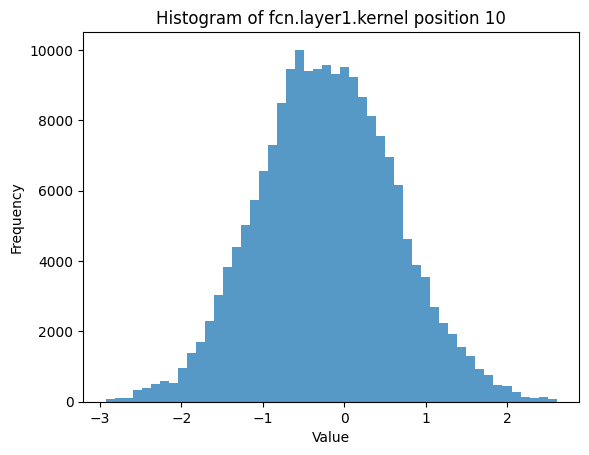

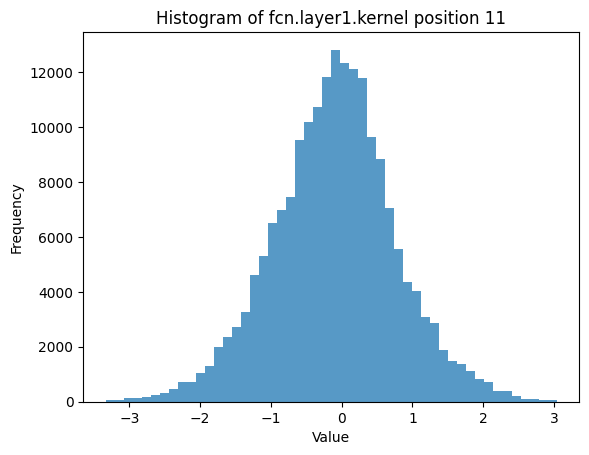

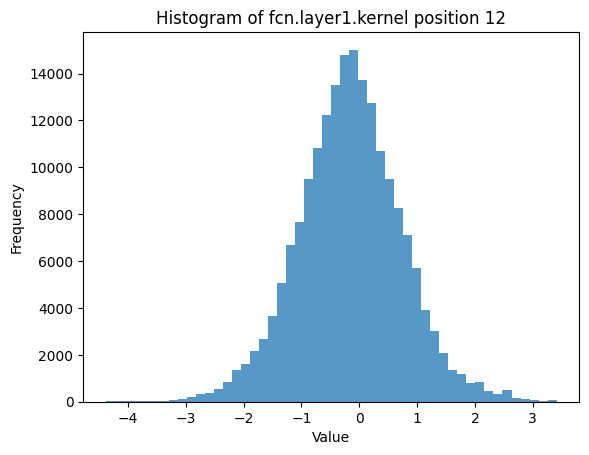

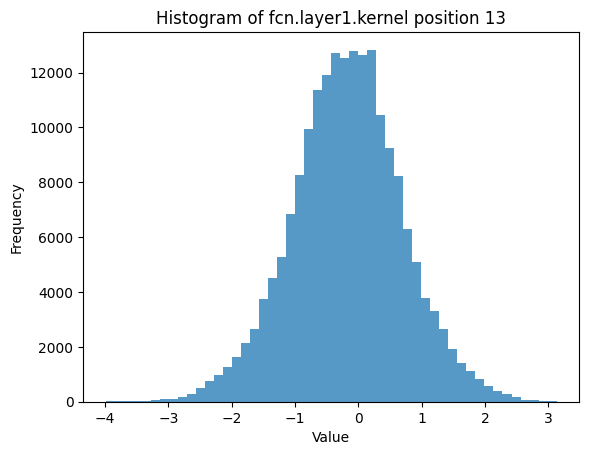

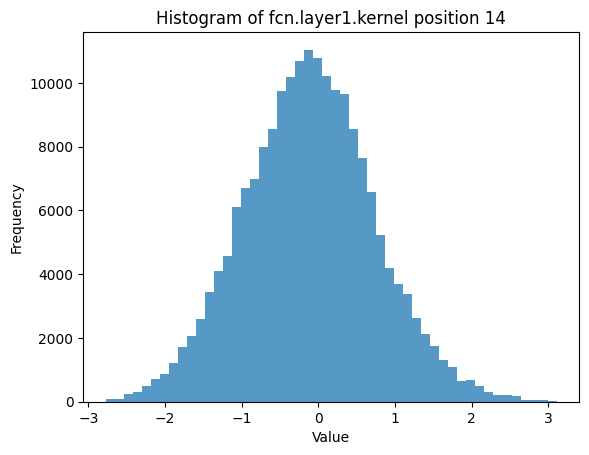

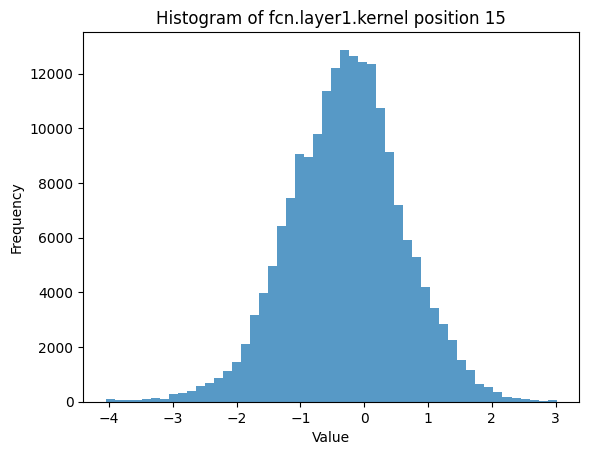

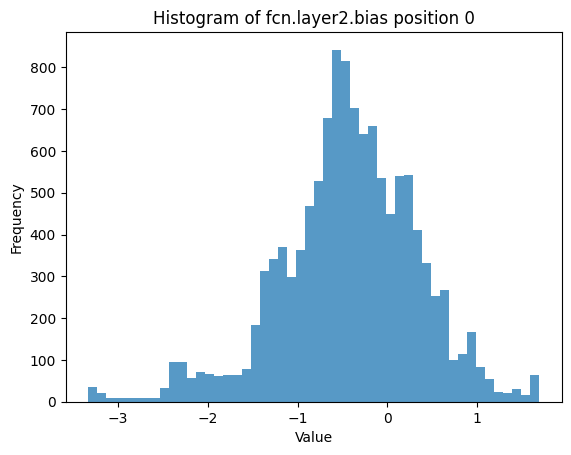

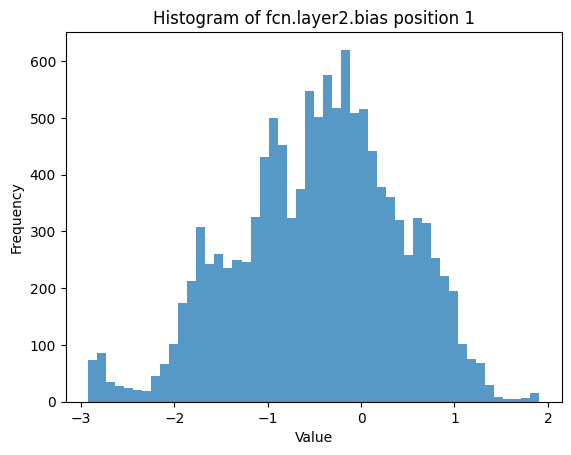

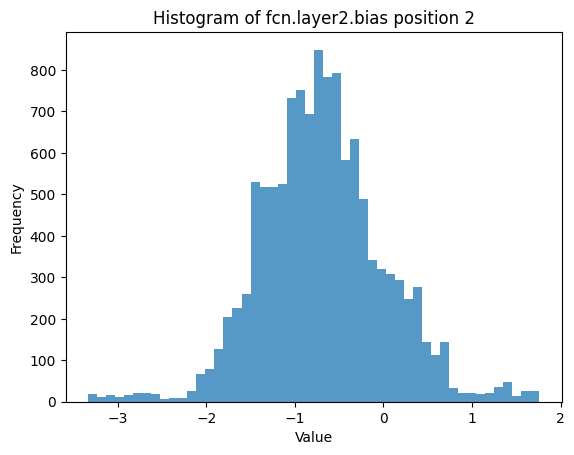

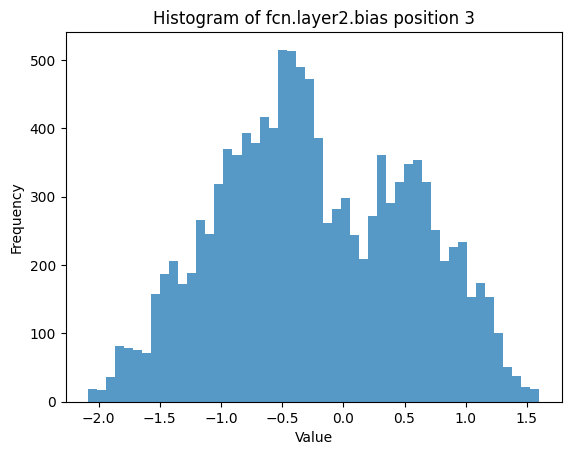

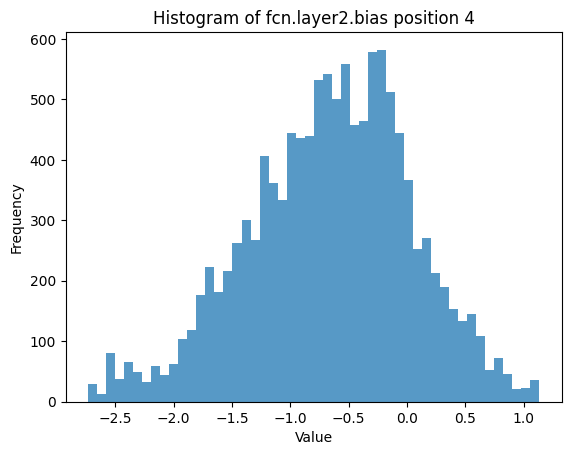

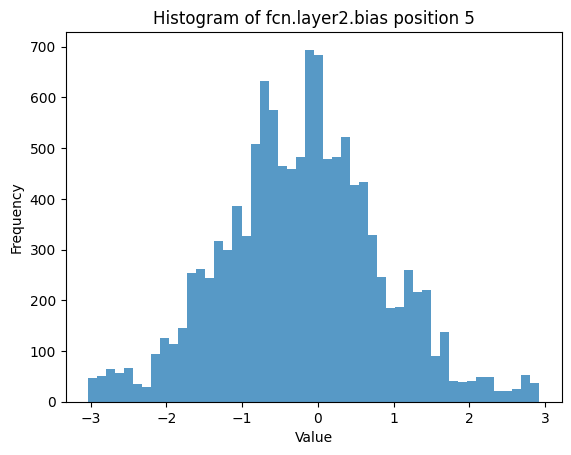

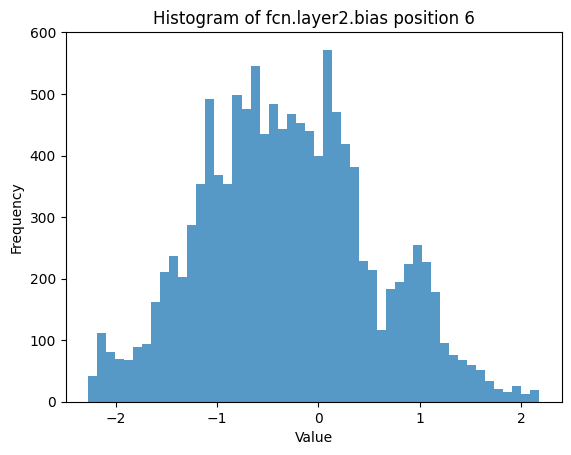

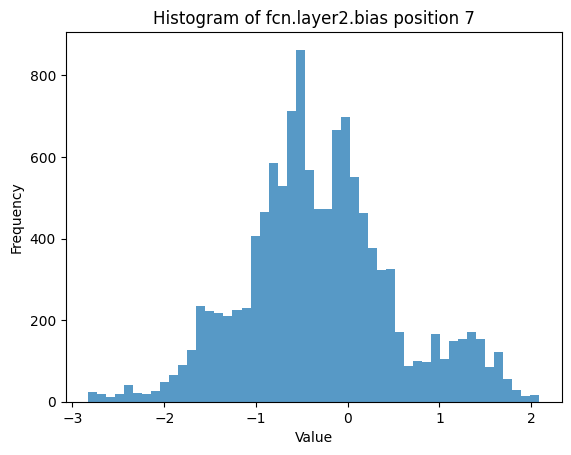

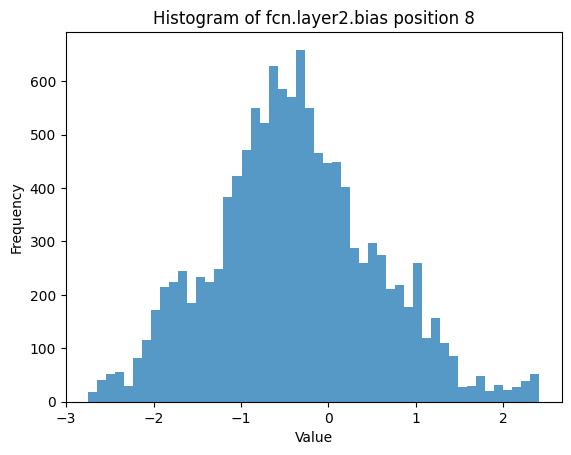

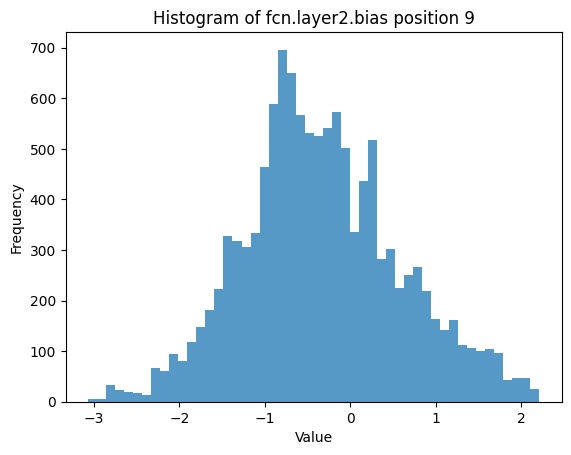

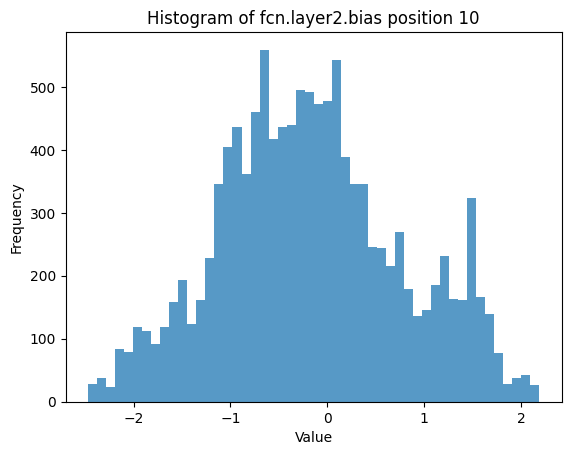

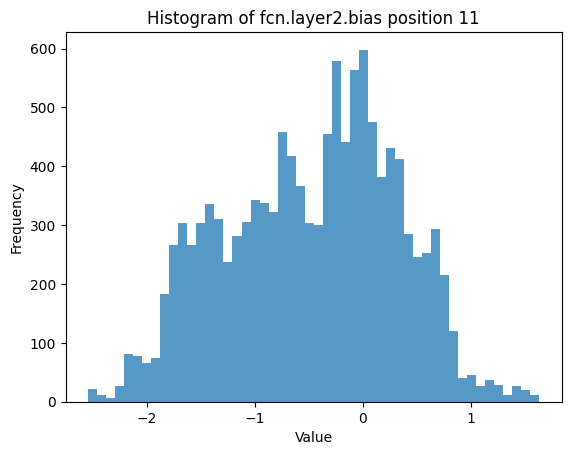

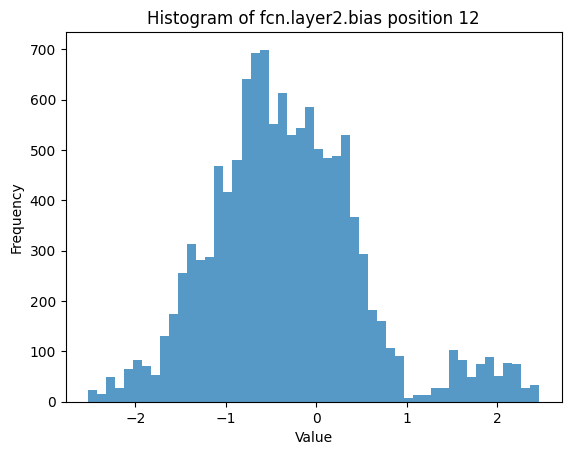

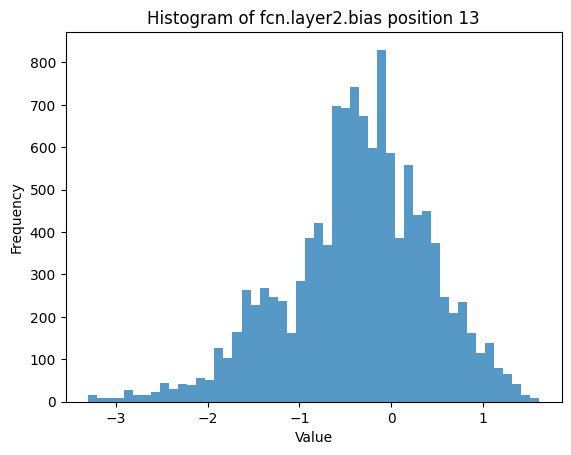

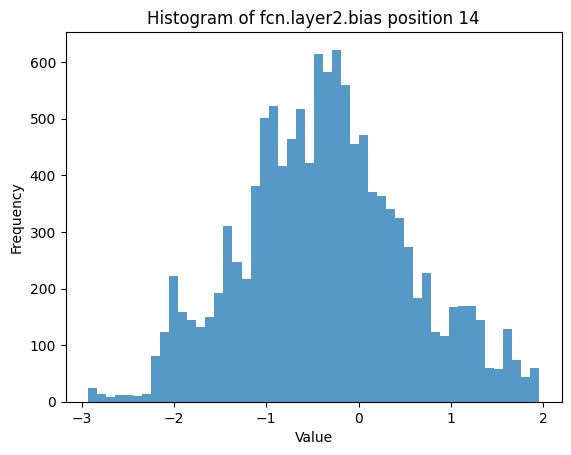

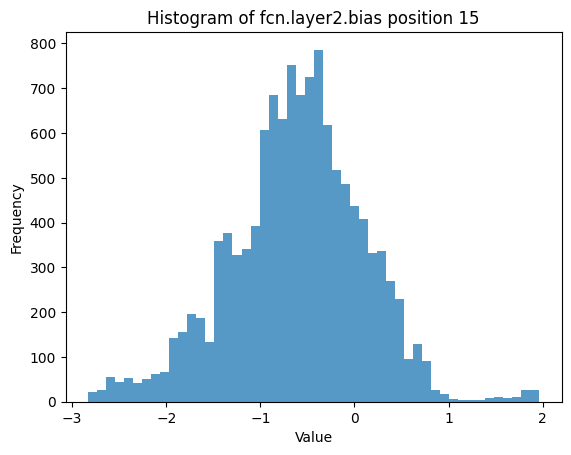

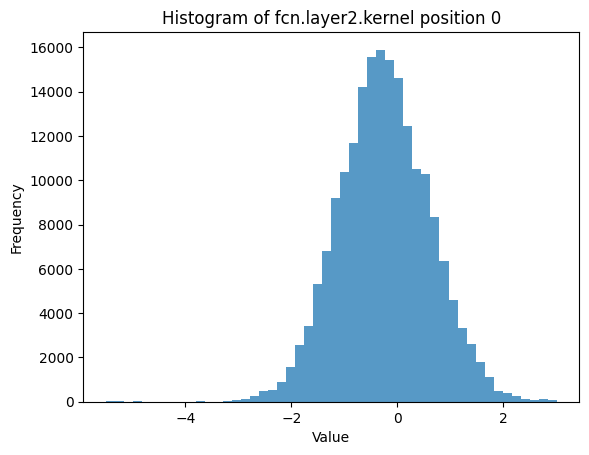

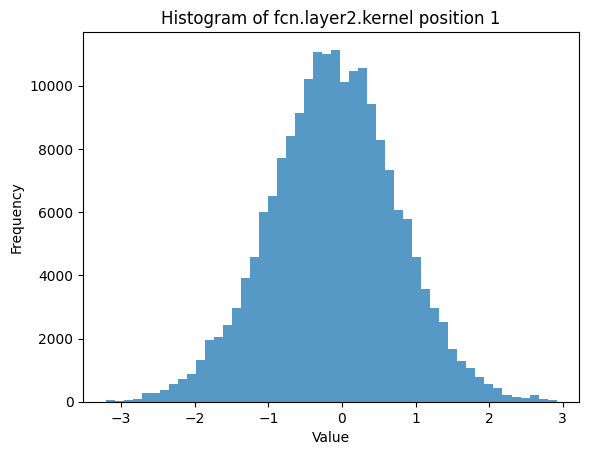

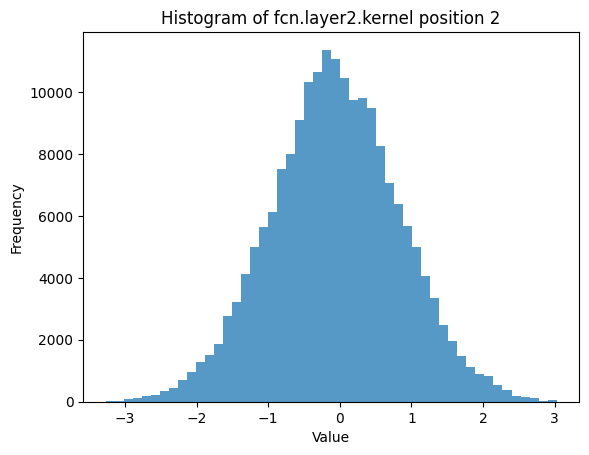

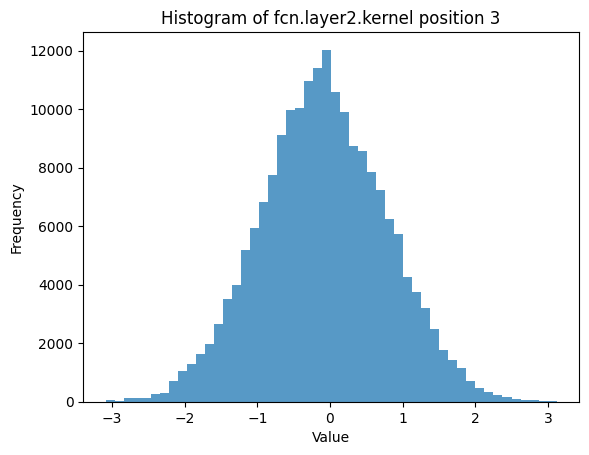

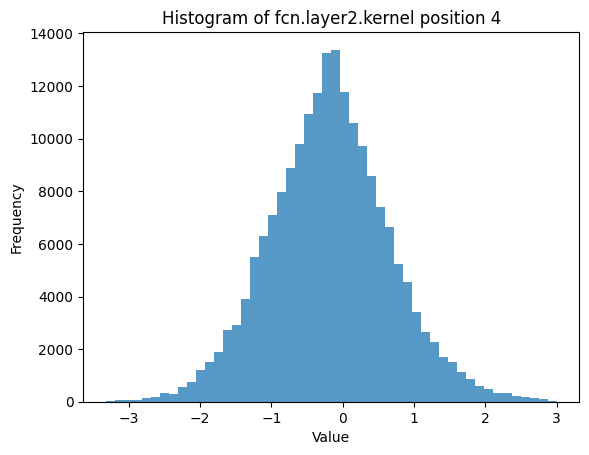

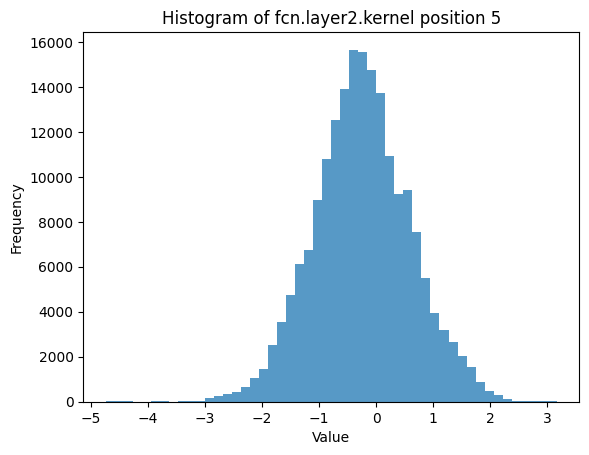

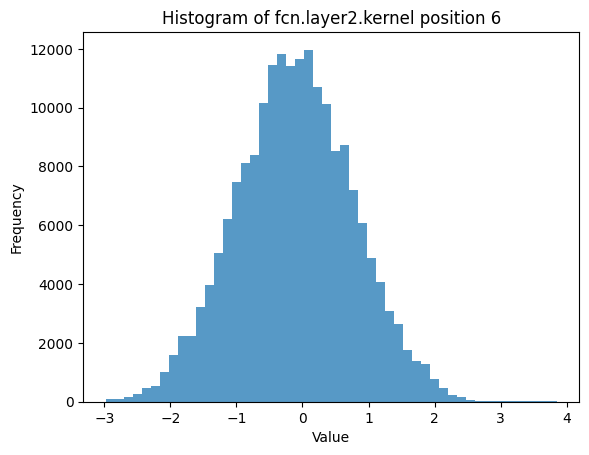

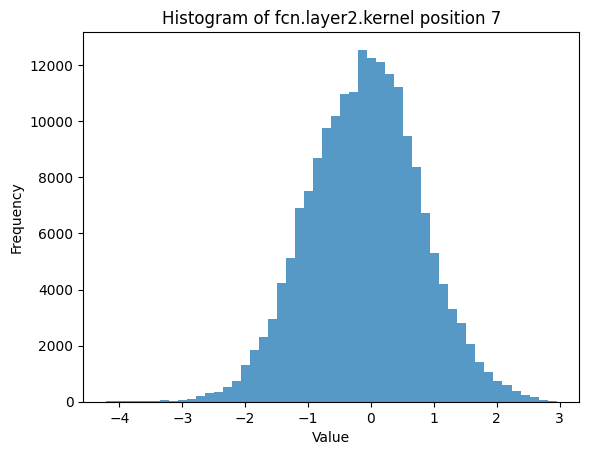

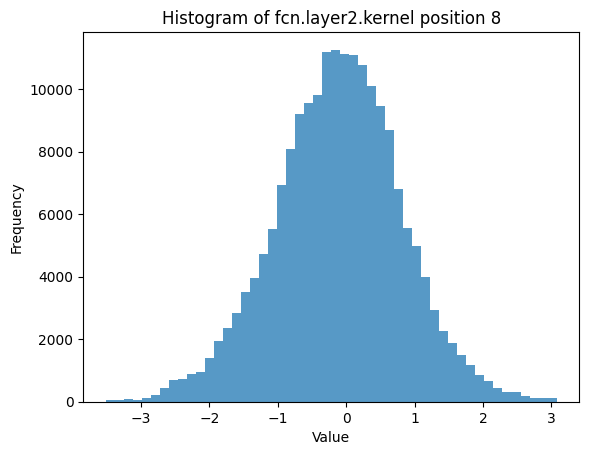

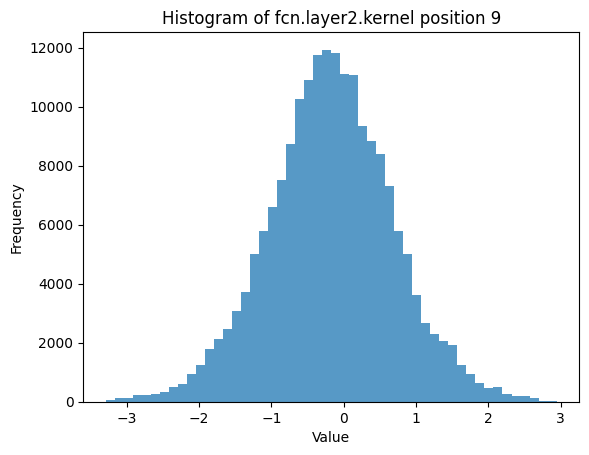

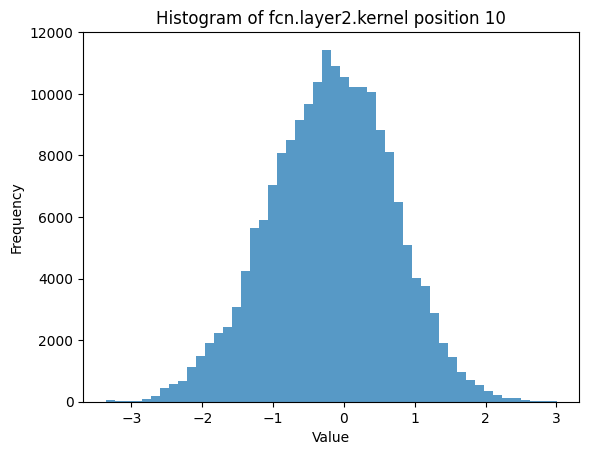

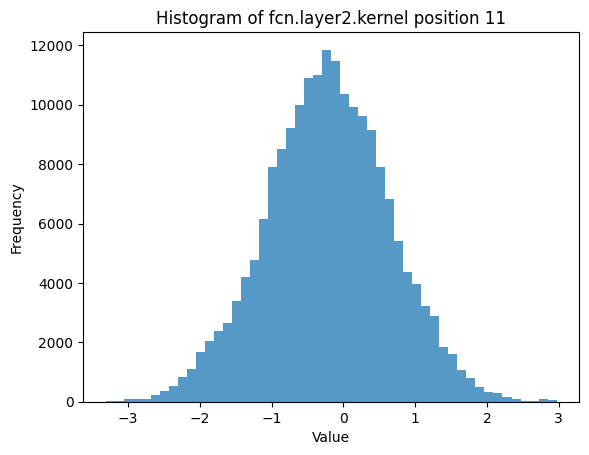

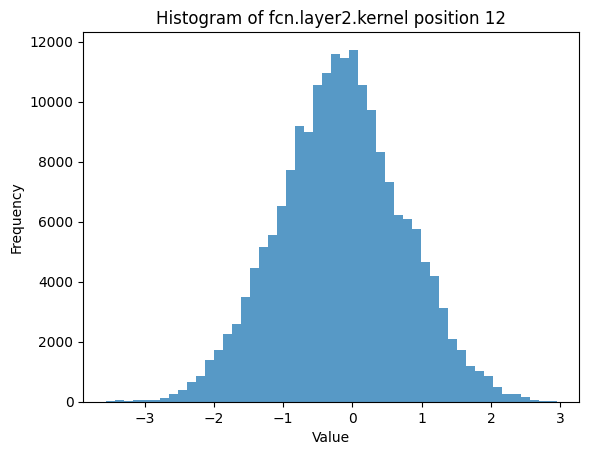

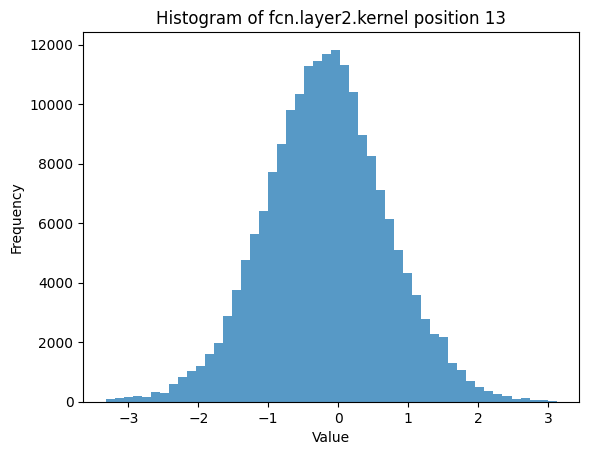

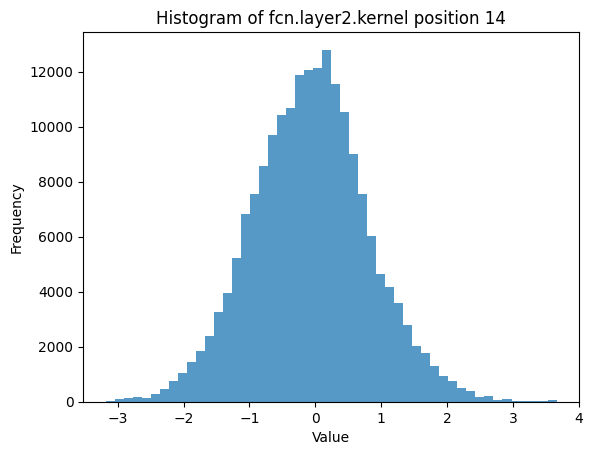

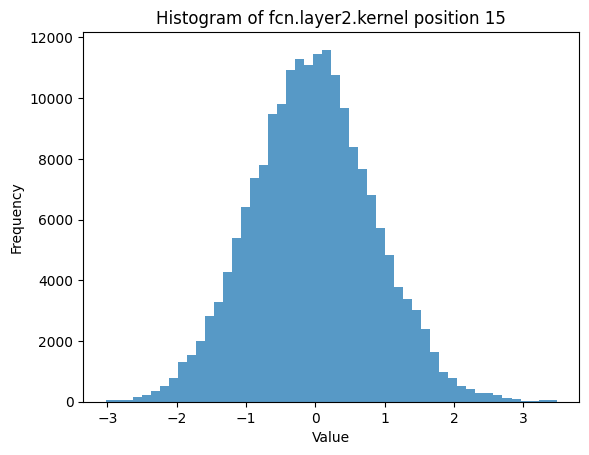

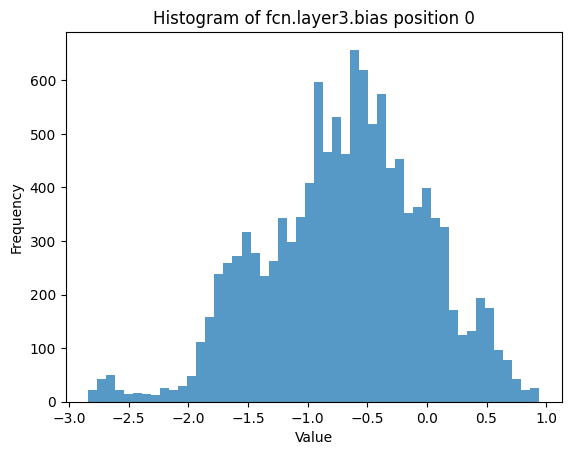

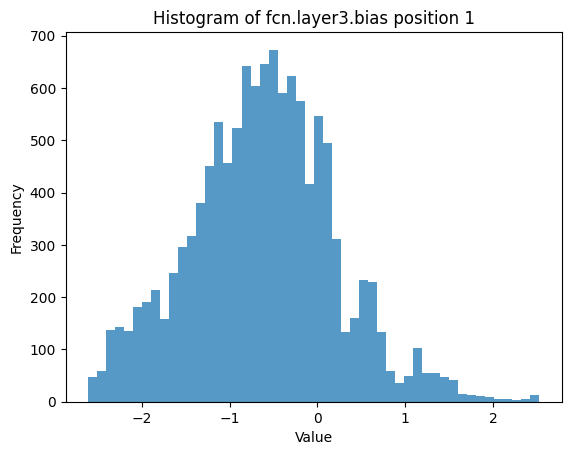

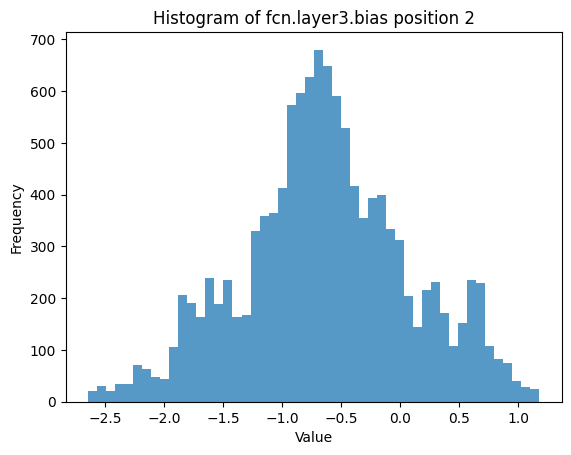

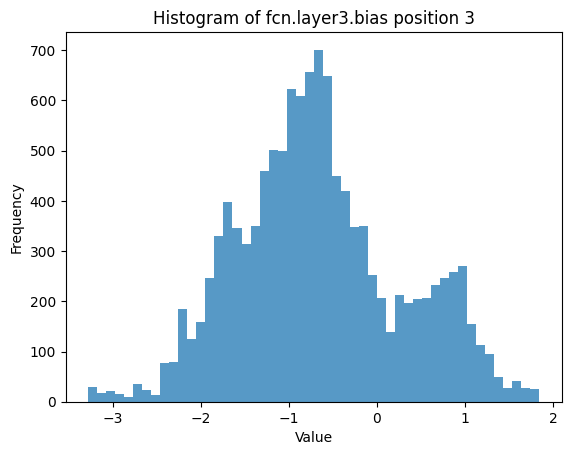

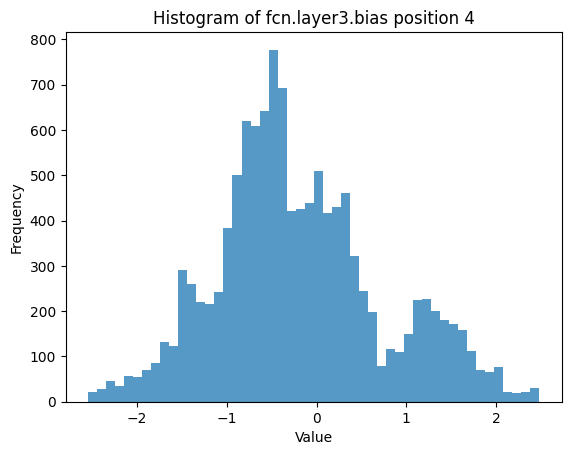

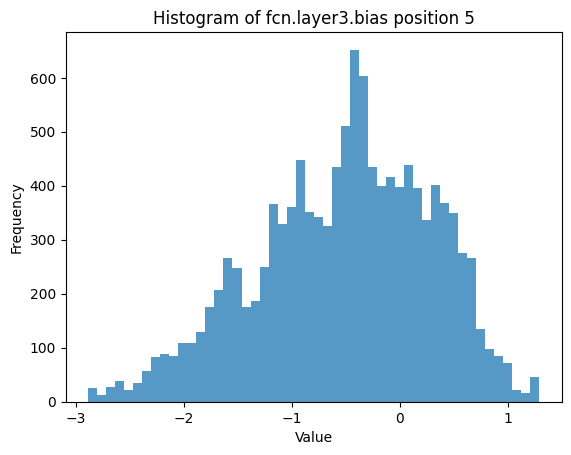

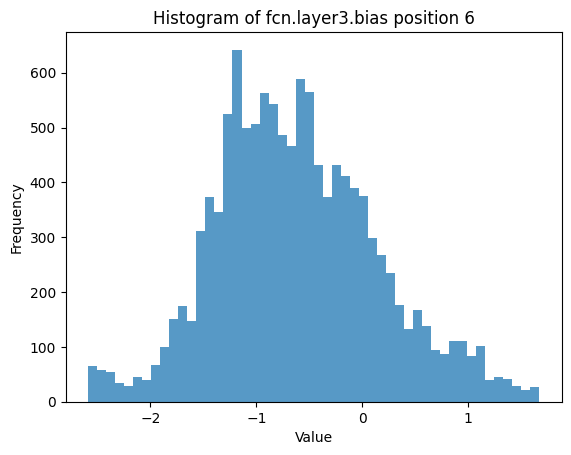

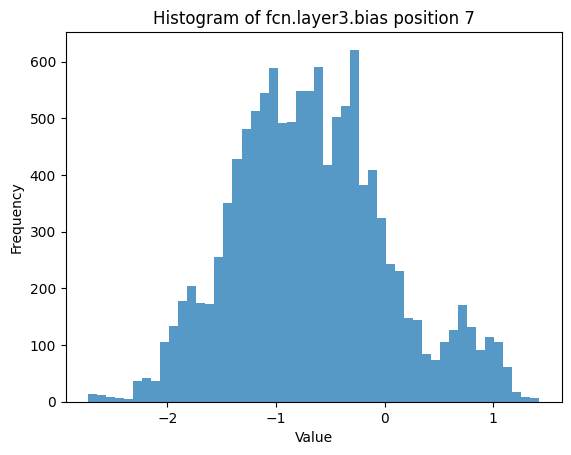

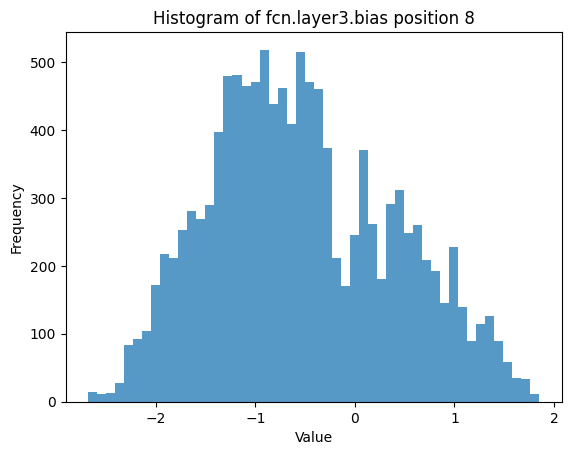

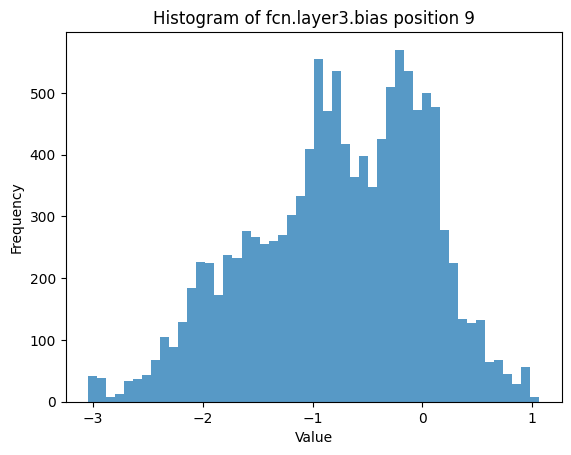

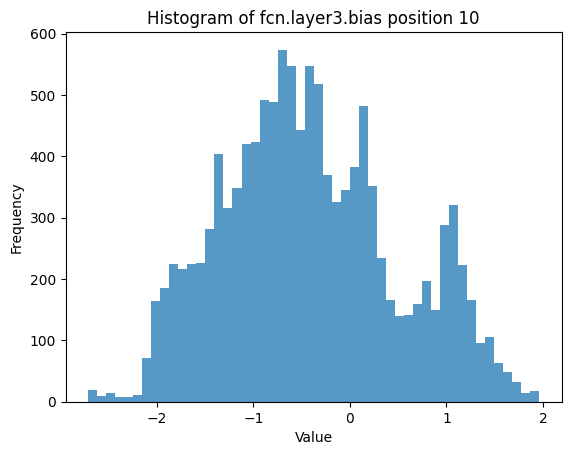

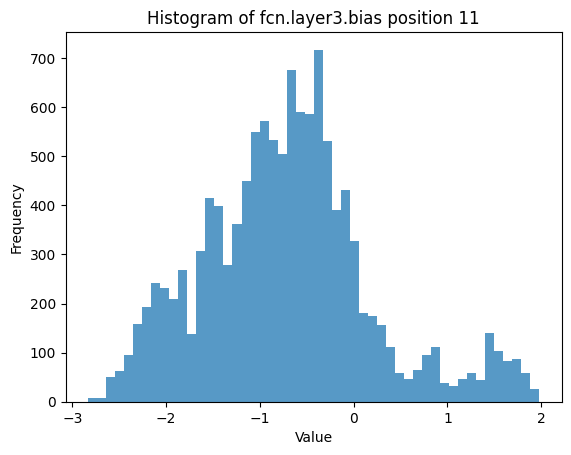

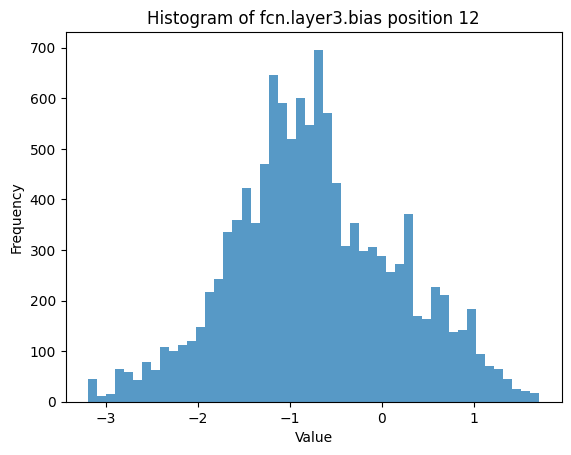

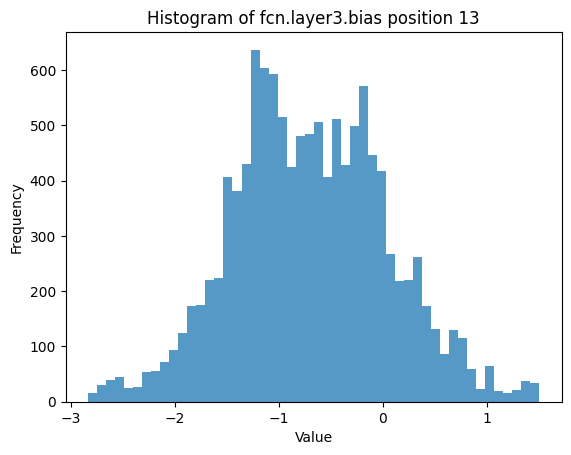

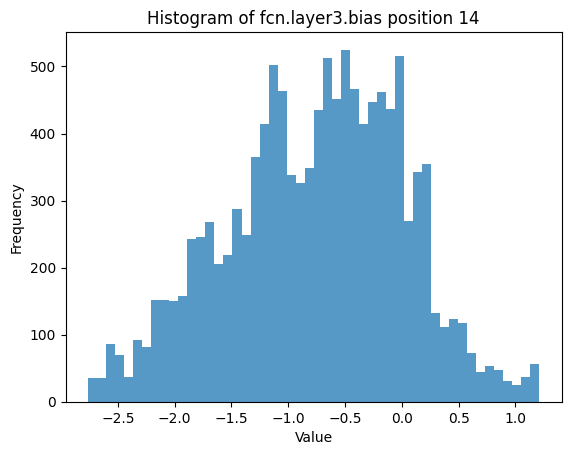

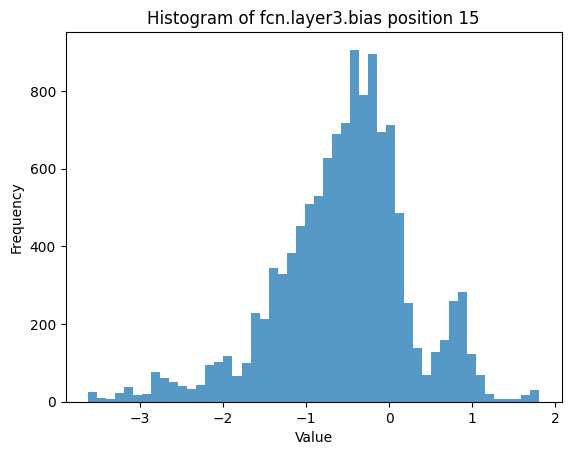

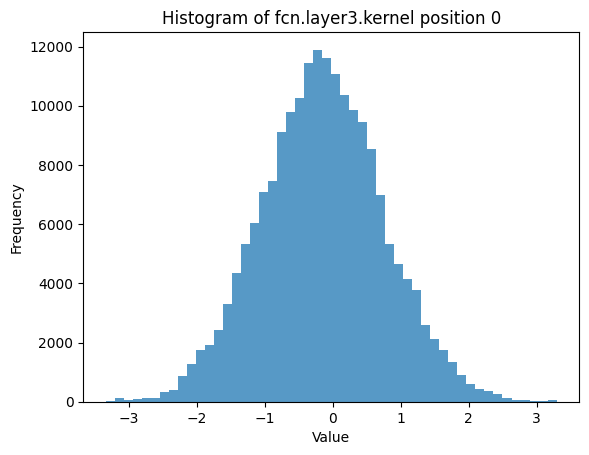

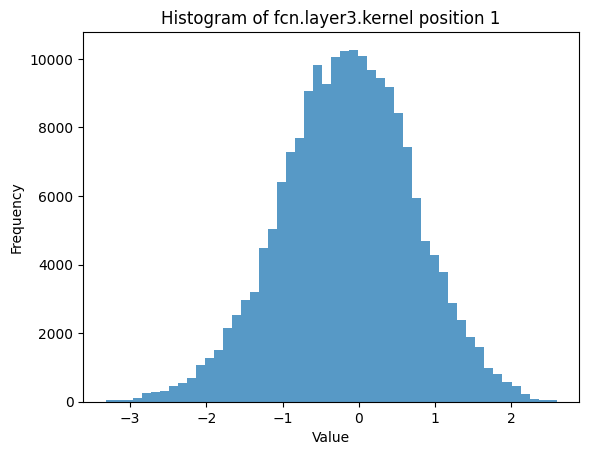

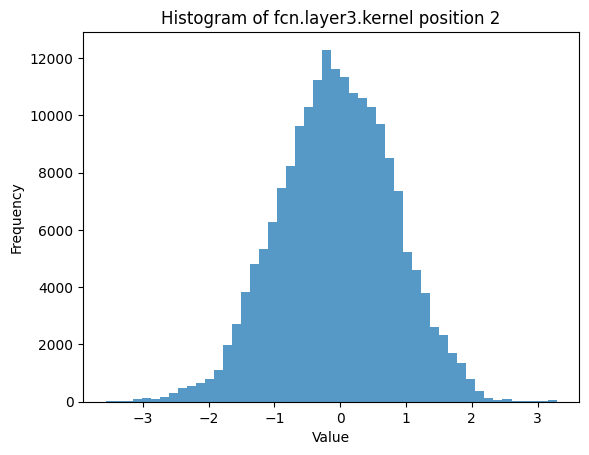

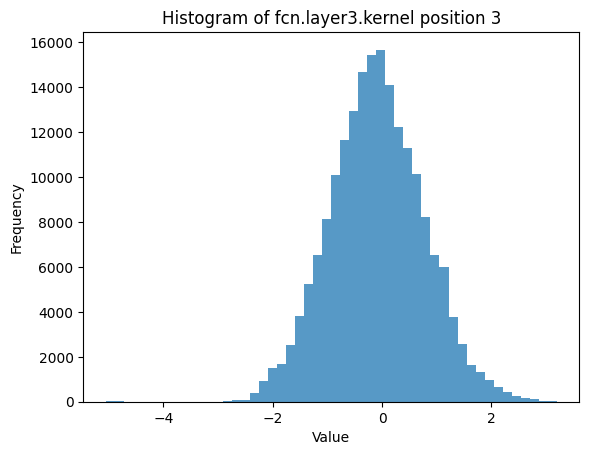

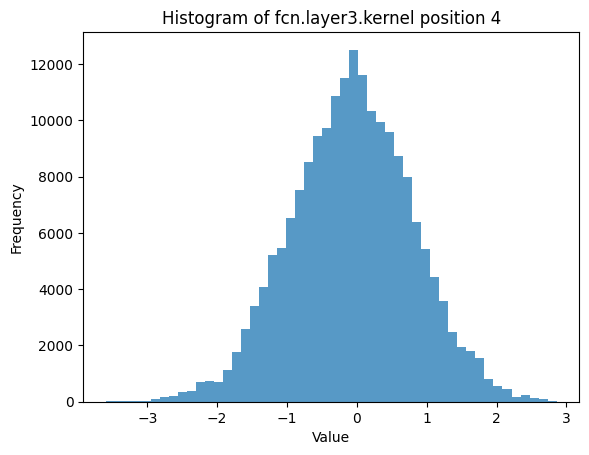

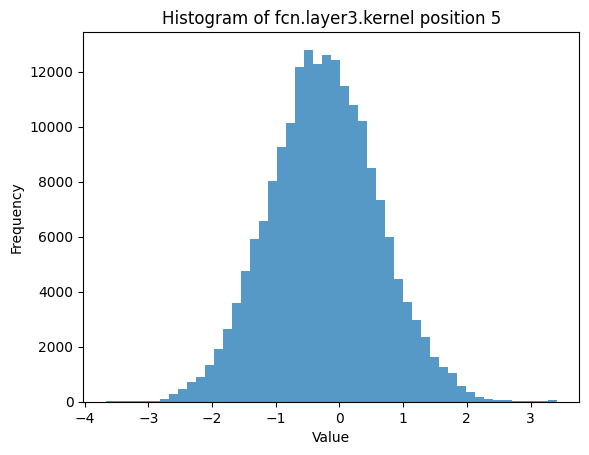

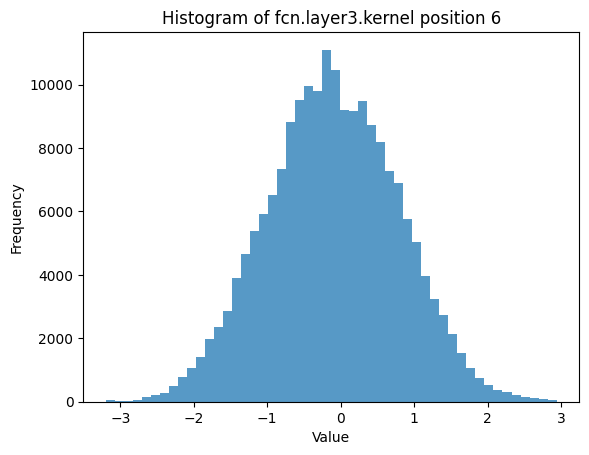

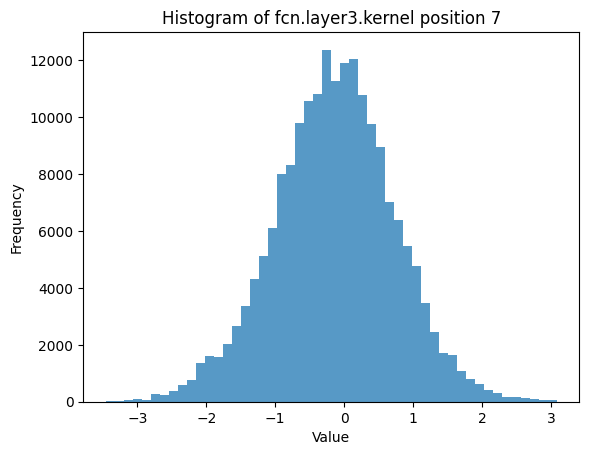

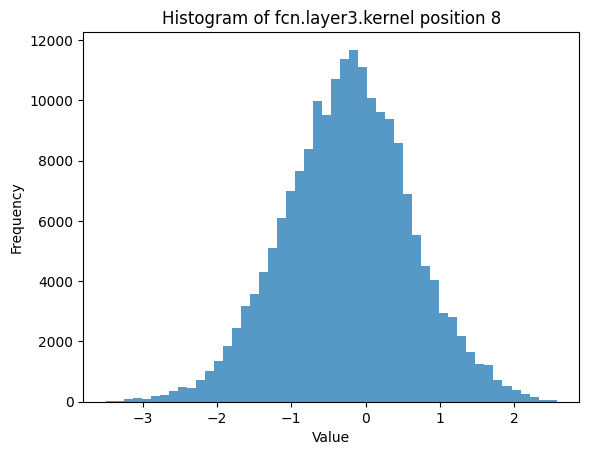

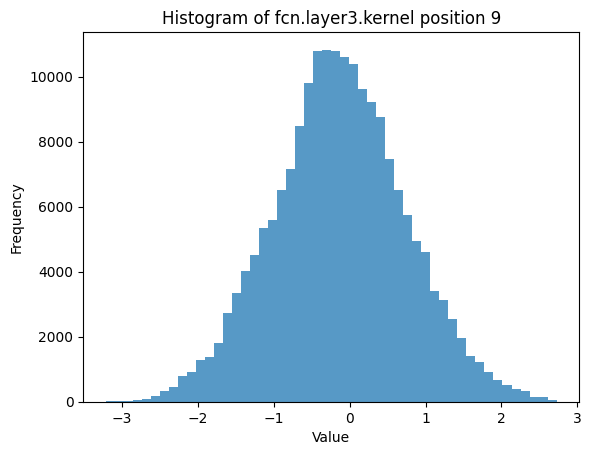

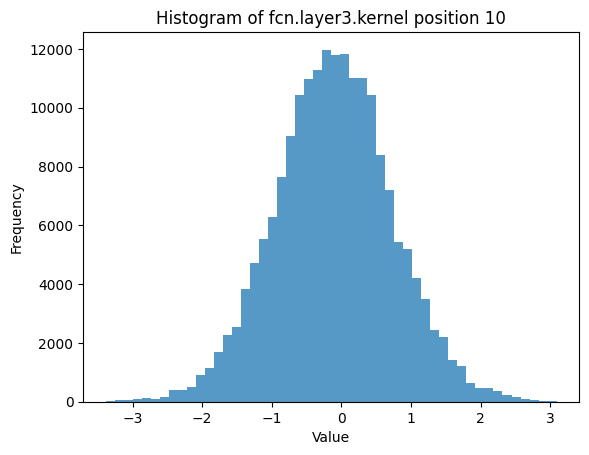

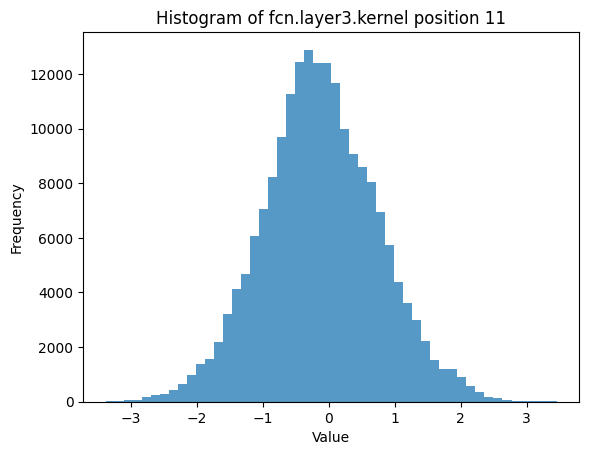

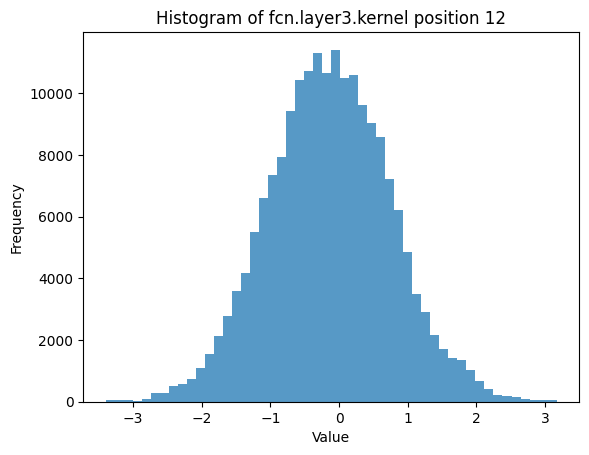

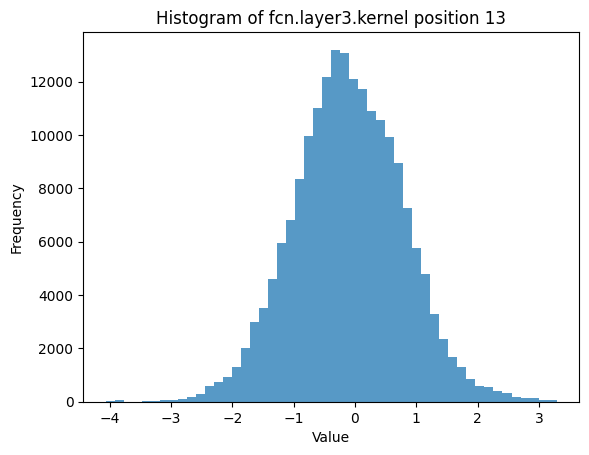

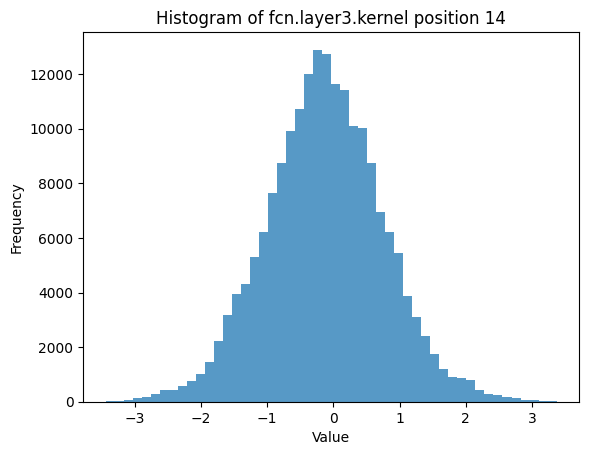

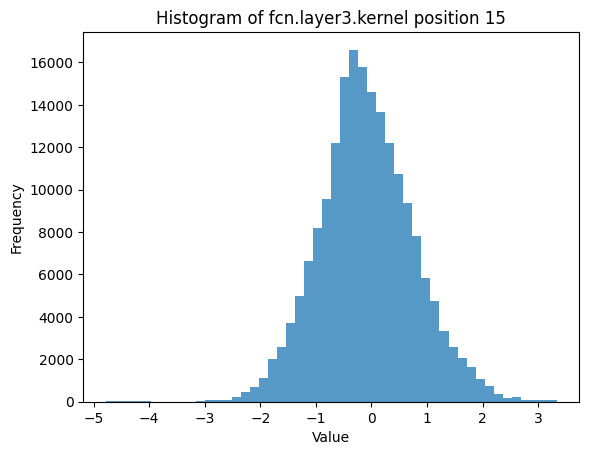

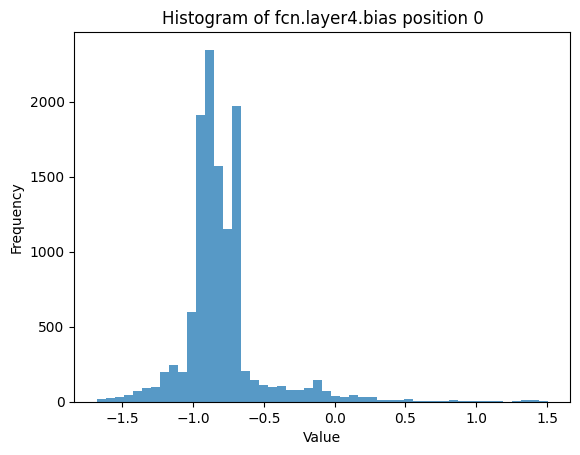

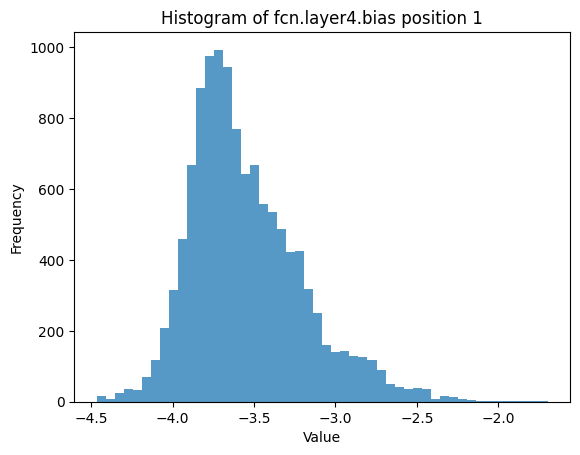

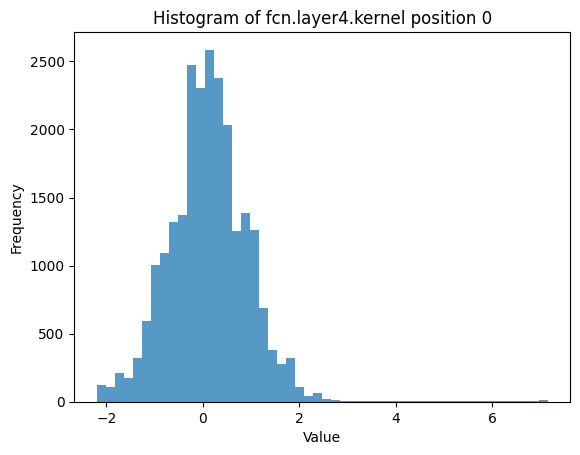

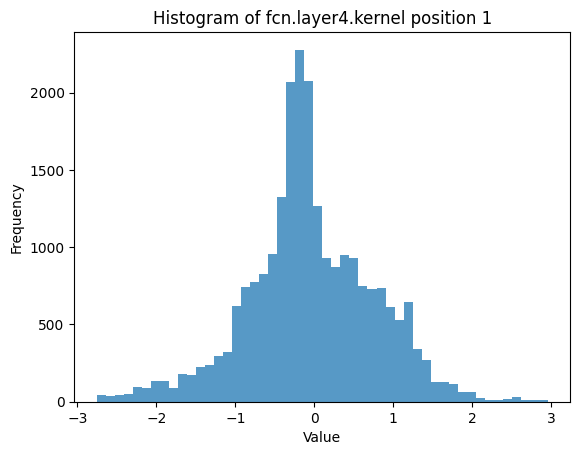

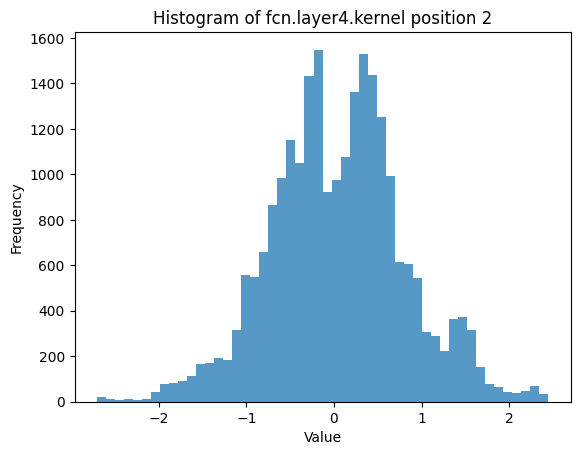

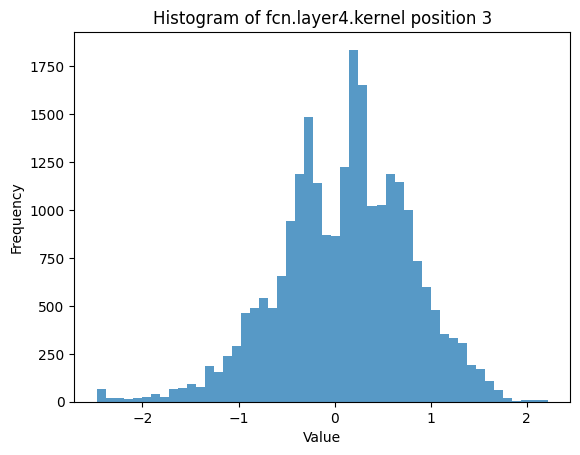

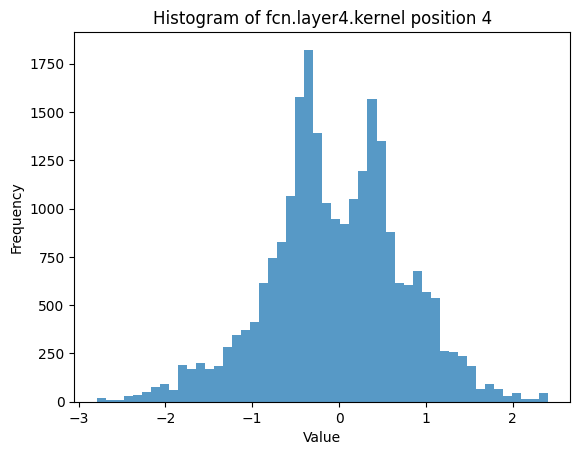

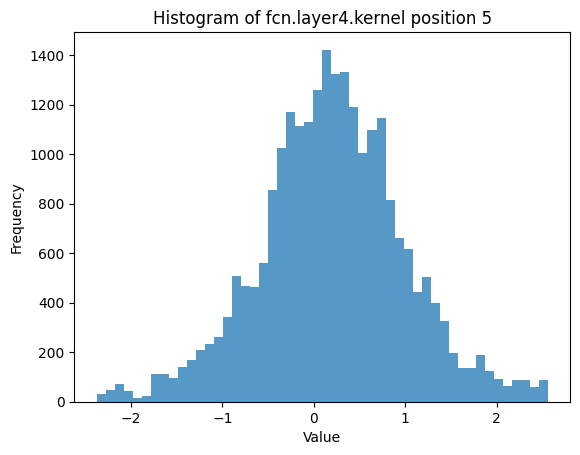

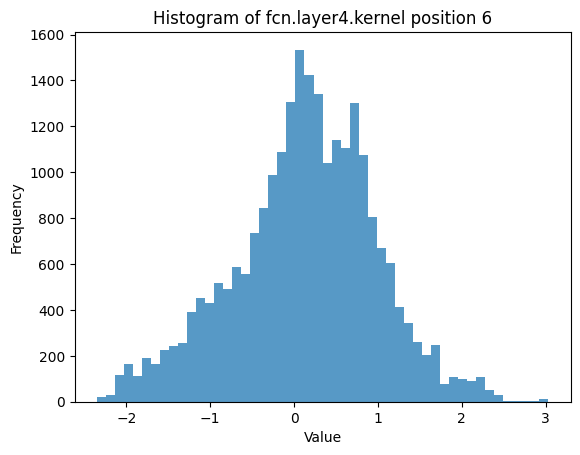

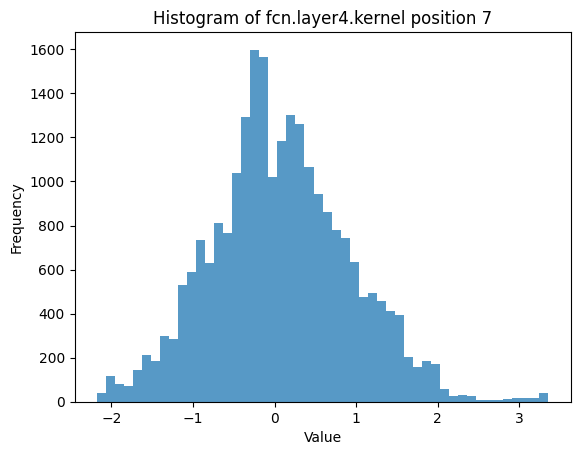

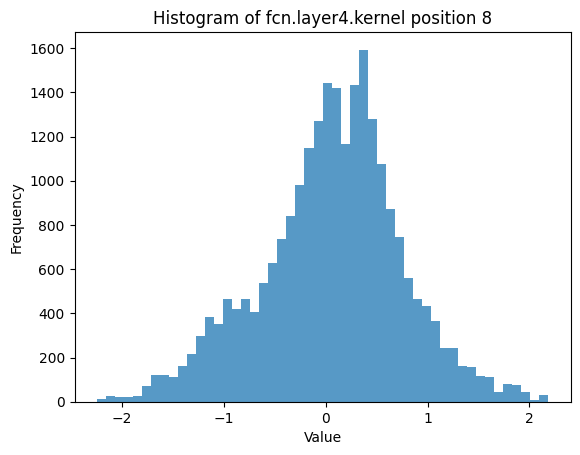

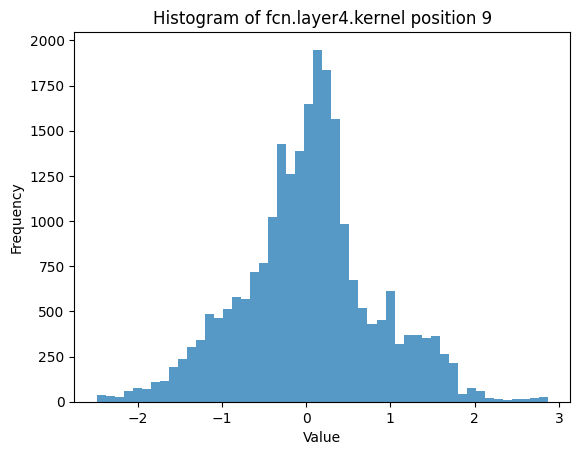

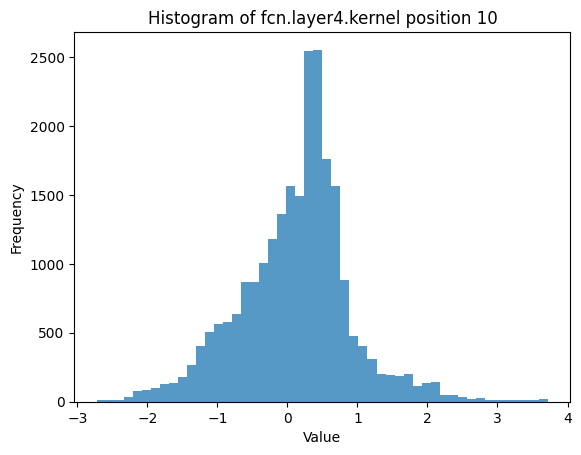

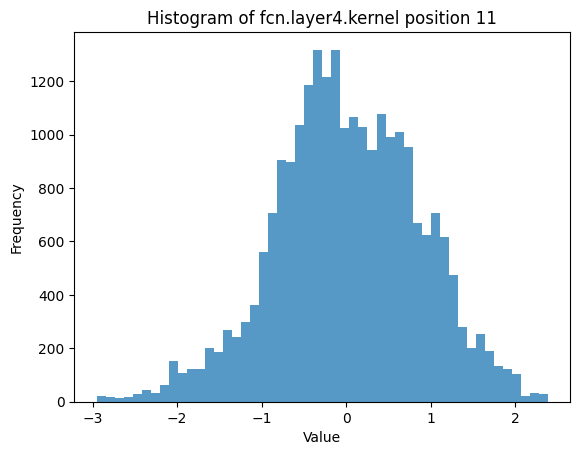

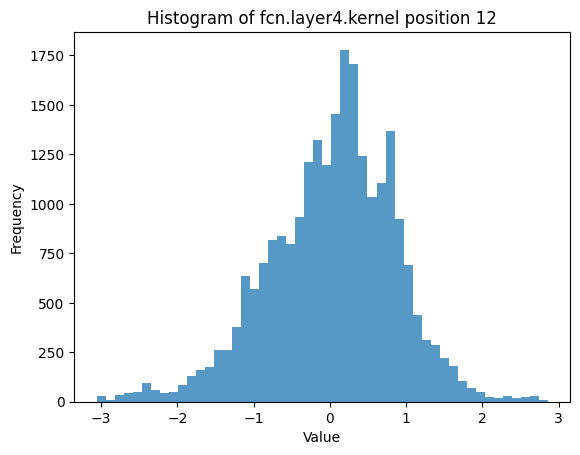

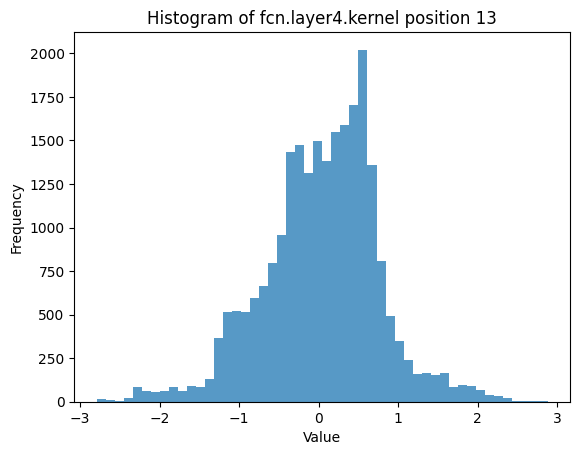

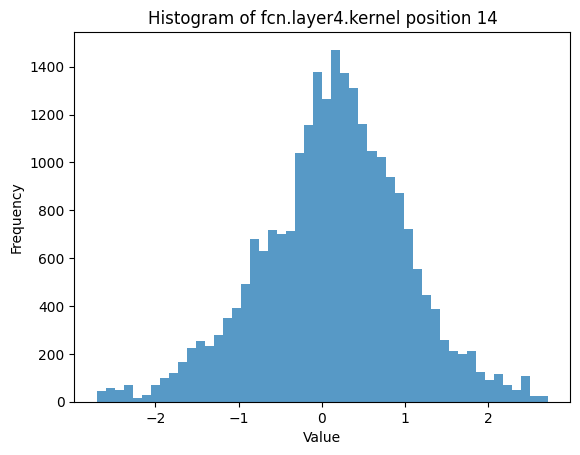

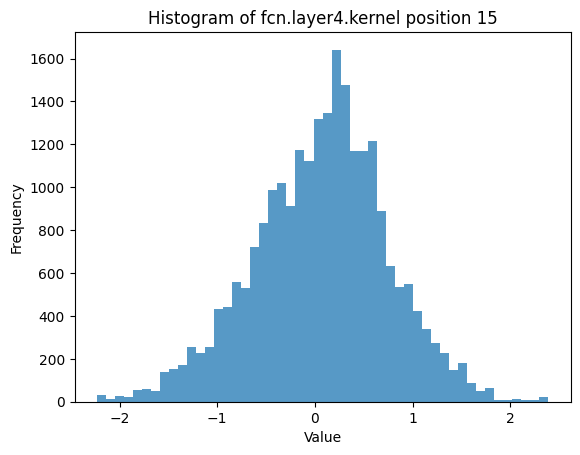

In [4]:
# Plot histograms of different positions of layers of kernel and bias
def plot_position_histograms(samples):
    for key in samples:
        layer_samples = samples[key]
        for i in range(layer_samples.shape[1]):
            plt.figure()
            plt.hist(layer_samples[:, i].flatten(), bins=50, alpha=0.75)
            plt.title(f'Histogram of {key} position {i}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.show()
plot_position_histograms(samples)

In [ ]:
# Plot PAC of kernels in 2-d
#def plot_pac(samples):
#    for key in samples:
#        if 'kernel' in key:
#            layer_samples = samples[key]
#            for i in range(layer_samples.shape[1]):
#                plt.figure()
#                plot_acf(layer_samples[:, i].flatten(), lags=50)
#                plt.title(f'PAC of {key} position {i}')
#                plt.show()

# Plot the figures
plot_histograms(samples)
plot_position_histograms(samples)
#plot_pac(samples)